In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import h5py
import json
from matplotlib.ticker import ScalarFormatter, AutoMinorLocator
import warnings
warnings.filterwarnings('ignore')
import os
import seaborn as sns
import random
import os
import pickle
from scipy.interpolate import interp1d
from scipy.optimize import brentq
from sklearn import metrics
import os

In [2]:
pd.read_csv('/Users/avinashkumarchaurasia/Desktop/project/BrainModels/Results/Lee2019/Experiments/Multi_Session/Siamese/Open_Set.csv').groupby(['dataset','evaluation', 'eval Type','pipeline']).agg({
                "subject": 'nunique',
                #'n_samples': 'first',
                #'accuracy': 'mean',
                #'auc': 'mean',
                #'eer': lambda x: f'{np.mean(x)*100:.2f} ± {np.std(x)*100:.2f}',
                'eer': lambda x: f'{np.mean(x)*100:.3f}',
                'frr_1_far': lambda x: f'{np.mean(x)*100:.3f}',
                'frr_0.1_far': lambda x: f'{np.mean(x)*100:.3f}',
                'frr_0.01_far': lambda x: f'{np.mean(x)*100:.3f}'
            }).reset_index()

dataset     evaluation eval Type pipeline  subject     eer frr_1_far  \
0  Lee2019_ERP  Multi Session  Open Set  siamese       54  20.680    72.611   

  frr_0.1_far frr_0.01_far  
0      86.704       89.500

================================================================================================================

<H1>Epochs Interval</H1>

================================================================================================================


## Effect of Epochs Interval

Under this Experiment, we analyze the effect of different epochs duration on the performance of our authentication systems across all the datasets. We tested the epochs duration of 1 seconds (-0.2 to 0.8), 1.2 seconds (-0.2 to 1.0), 1.4 seconds (-0.2 to 1.2), 1.6 seconds (-0.2 to 1.4), 1.8 seconds (-0.2 to 1.6) and 2.0 (-0.2 to 1.8). Below Parameters were applied for conducting this experiment

<H3>Datasets</H3>

BrainInvaders15a, ERPCORE: N400, ERPCORE: N400, Mantegna2019, COG-BCI Flanker, Lee2019, Won2022,     Huebner2017, Sosulski2019

<H3>Utilized Parameters:</H3>

•   Filtering: Band Pass Filtering (1 to 50 Hz)

•   Epoch Interval: [-0.2, 0.8], [-0.2, 1.0], [-0.2, 1.2], [-0.2, 1.4], [-0.2, 1.6], [-0.2, 1.8]. 

•   Baseline Correction Applied: Yes

•   Epochs Rejection threshold: No Epochs Rejection

•   Features: AR (order=1), PSD

•   Classifiers: LDA, SVM, KNN, RF, NB, LR, Siamese 

•   Evaluation Type: Single-Session Evaluation

•   Threat Case: Open-Set


In [3]:
main_dir=os.path.dirname(os.getcwd())
results_dir=os.path.join(main_dir, "Results")
brainInvaders_dir=os.path.join(results_dir, "BrainInvaders15a", 'Experiments')
COG_BCI_Flanker_dir=os.path.join(results_dir, "COG_BCI_Flanker", 'Experiments')
ERPCORE_N400_dir=os.path.join(results_dir, "ERPCORE_N400", 'Experiments')
ERPCORE_P300_dir=os.path.join(results_dir, "ERPCORE_P300", 'Experiments')
Huebner_LLP_dir=os.path.join(results_dir, "Huebner_LLP", 'Experiments')
Mantegna2019_dir=os.path.join(results_dir, "Mantegna2019", 'Experiments')
Sosulski2019_dir=os.path.join(results_dir, "Sosulski2019", 'Experiments')
Won2022_dir=os.path.join(results_dir, "Won2022", 'Experiments')
lee2019_dir=os.path.join(results_dir, "Lee2019", 'Experiments')

### Reading the results of dataset BrainInvaders15a

In [4]:
brain_shallow_classifiers_db=pd.read_csv(os.path.join(brainInvaders_dir, 'Different_Epochs_Interval', 'Shallow_Classifiers', 
                                                      'SOA_shallow_classifiers.csv'))
siamese_path=os.path.join(brainInvaders_dir, 'Different_Epochs_Interval', 'Siamese')
# List all files in the folder with a .csv extension
csv_files = [file for file in os.listdir(siamese_path) if file.endswith('.csv')]

# Initialize an empty list to store DataFrames
dfs = []

# Iterate over each CSV file and read it into a DataFrame
for csv_file in csv_files:
    file_path = os.path.join(siamese_path, csv_file)
    df = pd.read_csv(file_path)
    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
brain_interval_siamese_df = pd.concat(dfs, ignore_index=True)

brain_interval_siamese_df.rename(columns={'Epochs_Interval': 'epochs_duration'}, inplace=True)
#brain_interval_siamese_df

In [5]:
#brain_shallow_classifiers_db

### Reading the results of dataset ERPCORE:N400


In [6]:
erpcoreN400_shallow_classifiers_db=pd.read_csv(os.path.join(ERPCORE_N400_dir, 'Different_Epochs_Interval', 'Shallow_Classifiers', 
                                                      'SOA_shallow_classifiers.csv'))

siamese_path=os.path.join(ERPCORE_N400_dir, 'Different_Epochs_Interval', 'Siamese')
# List all files in the folder with a .csv extension
csv_files = [file for file in os.listdir(siamese_path) if file.endswith('.csv')]

# Initialize an empty list to store DataFrames
dfs = []

# Iterate over each CSV file and read it into a DataFrame
for csv_file in csv_files:
    file_path = os.path.join(siamese_path, csv_file)
    df = pd.read_csv(file_path)
    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
erpCore_N400_interval_siamese_df = pd.concat(dfs, ignore_index=True)  
erpCore_N400_interval_siamese_df.rename(columns={'Epochs_Interval': 'epochs_duration'}, inplace=True)

#brain_interval_siamese_df

### Reading the results of dataset ERPCORE:P300


In [7]:
erpcoreP300_shallow_classifiers_db=pd.read_csv(os.path.join(ERPCORE_P300_dir, 'Different_Epochs_Interval', 'Shallow_Classifiers', 
                                                      'SOA_shallow_classifiers.csv'))

siamese_path=os.path.join(ERPCORE_P300_dir, 'Different_Epochs_Interval', 'Siamese')
# List all files in the folder with a .csv extension
csv_files = [file for file in os.listdir(siamese_path) if file.endswith('.csv')]

# Initialize an empty list to store DataFrames
dfs = []

# Iterate over each CSV file and read it into a DataFrame
for csv_file in csv_files:
    file_path = os.path.join(siamese_path, csv_file)
    df = pd.read_csv(file_path)
    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
erpCore_P300_interval_siamese_df = pd.concat(dfs, ignore_index=True) 
erpCore_P300_interval_siamese_df.rename(columns={'Epochs_Interval': 'epochs_duration'}, inplace=True)

#brain_interval_siamese_df

### Reading the results of dataset COGBCI Flanker


In [8]:
cogbci_shallow_classifiers_db=pd.read_csv(os.path.join(COG_BCI_Flanker_dir, 'Different_Epochs_Interval', 'Shallow_Classifiers', 
                                                      'SOA_shallow_classifiers.csv'))

siamese_path=os.path.join(COG_BCI_Flanker_dir, 'Different_Epochs_Interval', 'Siamese')
# List all files in the folder with a .csv extension
csv_files = [file for file in os.listdir(siamese_path) if file.endswith('.csv')]

# Initialize an empty list to store DataFrames
dfs = []

# Iterate over each CSV file and read it into a DataFrame
for csv_file in csv_files:
    file_path = os.path.join(siamese_path, csv_file)
    df = pd.read_csv(file_path)
    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
cogbci_interval_siamese_df = pd.concat(dfs, ignore_index=True) 
cogbci_interval_siamese_df.rename(columns={'Epochs_Interval': 'epochs_duration'}, inplace=True)

#brain_interval_siamese_df

### Reading the results of dataset Huebner2017


In [9]:
huebner_shallow_classifiers_db=pd.read_csv(os.path.join(Huebner_LLP_dir, 'Different_Epochs_Interval', 'Shallow_Classifiers', 
                                                      'SOA_shallow_classifiers.csv'))

siamese_path=os.path.join(Huebner_LLP_dir, 'Different_Epochs_Interval', 'Siamese')
# List all files in the folder with a .csv extension
csv_files = [file for file in os.listdir(siamese_path) if file.endswith('.csv')]

# Initialize an empty list to store DataFrames
dfs = []

# Iterate over each CSV file and read it into a DataFrame
for csv_file in csv_files:
    file_path = os.path.join(siamese_path, csv_file)
    df = pd.read_csv(file_path)
    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
huebner_interval_siamese_df = pd.concat(dfs, ignore_index=True)  
huebner_interval_siamese_df.rename(columns={'Epochs_Interval': 'epochs_duration'}, inplace=True)

#brain_interval_siamese_df



### Reading the results of dataset Sosulski2019


In [10]:
sosulski_shallow_classifiers_db=pd.read_csv(os.path.join(Sosulski2019_dir, 'Different_Epochs_Interval', 'Shallow_Classifiers', 
                                                      'SOA_shallow_classifiers.csv'))

siamese_path=os.path.join(Sosulski2019_dir, 'Different_Epochs_Interval', 'Siamese')
# List all files in the folder with a .csv extension
csv_files = [file for file in os.listdir(siamese_path) if file.endswith('.csv')]

# Initialize an empty list to store DataFrames
dfs = []

# Iterate over each CSV file and read it into a DataFrame
for csv_file in csv_files:
    file_path = os.path.join(siamese_path, csv_file)
    df = pd.read_csv(file_path)
    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
sosulski_interval_siamese_df = pd.concat(dfs, ignore_index=True)  
sosulski_interval_siamese_df.rename(columns={'Epochs_Interval': 'epochs_duration'}, inplace=True)


#brain_interval_siamese_df



### Reading the results of dataset Mantegna2019


In [11]:
mantegna_shallow_classifiers_db=pd.read_csv(os.path.join(Mantegna2019_dir, 'Different_Epochs_Interval', 'Shallow_Classifiers', 
                                                      'SOA_shallow_classifiers.csv'))

siamese_path=os.path.join(Mantegna2019_dir, 'Different_Epochs_Interval', 'Siamese')
# List all files in the folder with a .csv extension
csv_files = [file for file in os.listdir(siamese_path) if file.endswith('.csv')]

# Initialize an empty list to store DataFrames
dfs = []

# Iterate over each CSV file and read it into a DataFrame
for csv_file in csv_files:
    file_path = os.path.join(siamese_path, csv_file)
    df = pd.read_csv(file_path)
    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
mantegna_interval_siamese_df = pd.concat(dfs, ignore_index=True)  
mantegna_interval_siamese_df.rename(columns={'Epochs_Interval': 'epochs_duration'}, inplace=True)

#brain_interval_siamese_df

### Reading the results of dataset Won2022


In [12]:
won2022_shallow_classifiers_db=pd.read_csv(os.path.join(Won2022_dir, 'Different_Epochs_Interval', 'Shallow_Classifiers', 
                                                      'SOA_shallow_classifiers.csv'))


siamese_path=os.path.join(Won2022_dir, 'Different_Epochs_Interval', 'Siamese')
# List all files in the folder with a .csv extension
csv_files = [file for file in os.listdir(siamese_path) if file.endswith('.csv')]

# Initialize an empty list to store DataFrames
dfs = []

# Iterate over each CSV file and read it into a DataFrame
for csv_file in csv_files:
    file_path = os.path.join(siamese_path, csv_file)
    df = pd.read_csv(file_path)
    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
won2022_interval_siamese_df = pd.concat(dfs, ignore_index=True)  
#brain_interval_siamese_df

### Reading the results of dataset Lee2019

In [13]:
lee2019_shallow_classifiers_db=pd.read_csv(os.path.join(lee2019_dir, 'Different_Epochs_Interval', 'Shallow_Classifiers', 
                                                      'SOA_shallow_classifiers.csv'))

In [14]:
df_epochs_interval_db=pd.concat([brain_shallow_classifiers_db, brain_interval_siamese_df,
                                 erpcoreN400_shallow_classifiers_db, erpCore_N400_interval_siamese_df,  
                                 erpcoreP300_shallow_classifiers_db, erpCore_P300_interval_siamese_df, 
                                    cogbci_shallow_classifiers_db, cogbci_interval_siamese_df,  
                                 huebner_shallow_classifiers_db, huebner_interval_siamese_df,  
                                 sosulski_shallow_classifiers_db, sosulski_interval_siamese_df, 
                                    mantegna_shallow_classifiers_db, mantegna_interval_siamese_df, 
                                 won2022_shallow_classifiers_db, won2022_interval_siamese_df,
                                lee2019_shallow_classifiers_db], axis=0)

In [15]:
#df_epochs_interval_db.pipeline.unique()

In [16]:
df_epochs_interval_db.drop(columns=['evaluation', 'Unnamed: 0'], inplace=True)

In [17]:
#df_shallow_classifiers

In [18]:
df_epochs_interval_db['pipeline'] = df_epochs_interval_db['pipeline'].apply(lambda x: x.split('+')[-1])


In [19]:
df_epochs_interval_db.pipeline.unique()

array(['SVM', 'LR', 'LDA', 'NB', 'KNN', 'RF', 'siamese'], dtype=object)

In [20]:
df_epochs_interval_db.dataset.unique()

array(['Brain Invaders 2015a', 'erpcore n400', 'erpcore p300',
       'COG-BCI Flanker', 'Visual Speller LLP', 'Spot Pilot P300 dataset',
       'mantegna 2019', 'won 2022', 'Lee2019_ERP'], dtype=object)

In [21]:
df_epochs_interval_db['dataset'].replace({'Visual Speller LLP': "Huebner2017", 'Spot Pilot P300 dataset':'Sosulski2019'}, inplace=True)

In [22]:
#df_epochs_interval_db[['pipeline', 'dataset']].value_counts()
#df_epochs_interval_db[df_epochs_interval_db['pipeline']=='Siamese']
df_epochs_interval_db['pipeline'].replace({'siamese':'Siamese'}, inplace=True)


### Grouping the results of Epochs Duration

In [23]:
#df_sample_size.head()
grouped_epochs_interval_df=df_epochs_interval_db.groupby(['dataset', 'pipeline','epochs_duration']).agg({
                #'accuracy': 'mean',
                'eer': lambda x: f'{np.mean(x)*100:.3f}',
                'frr_1_far': lambda x: f'{np.mean(x)*100:.3f}',
                'frr_0.1_far': lambda x: f'{np.mean(x)*100:.3f}',
                'frr_0.01_far': lambda x: f'{np.mean(x)*100:.3f}'
            }).reset_index()

#grouped_epochs_interval_df.pipeline.unique()

In [24]:
#grouped_epochs_interval_df.pipeline.unique()
#gr

grouped_epochs_interval_df['dataset'].replace({'Brain Invaders 2015a': 'BrainInvaders2015a',
                                              'COG-BCI Flanker': 'COG_BCI_Flanker',
                                               'Huebner2017': 'Huebner_LLP',
                                               'Lee2019_ERP': 'Lee2019',
                                               'erpcore n400': 'ERPCORE_N400',
                                               'erpcore p300': 'ERPCORE_P300',
                                               'mantegna 2019':'Mantegna2019',
                                               'won 2022': 'Won2022'}, inplace=True)

### Visualzing all the results of Eochs duration in subplots

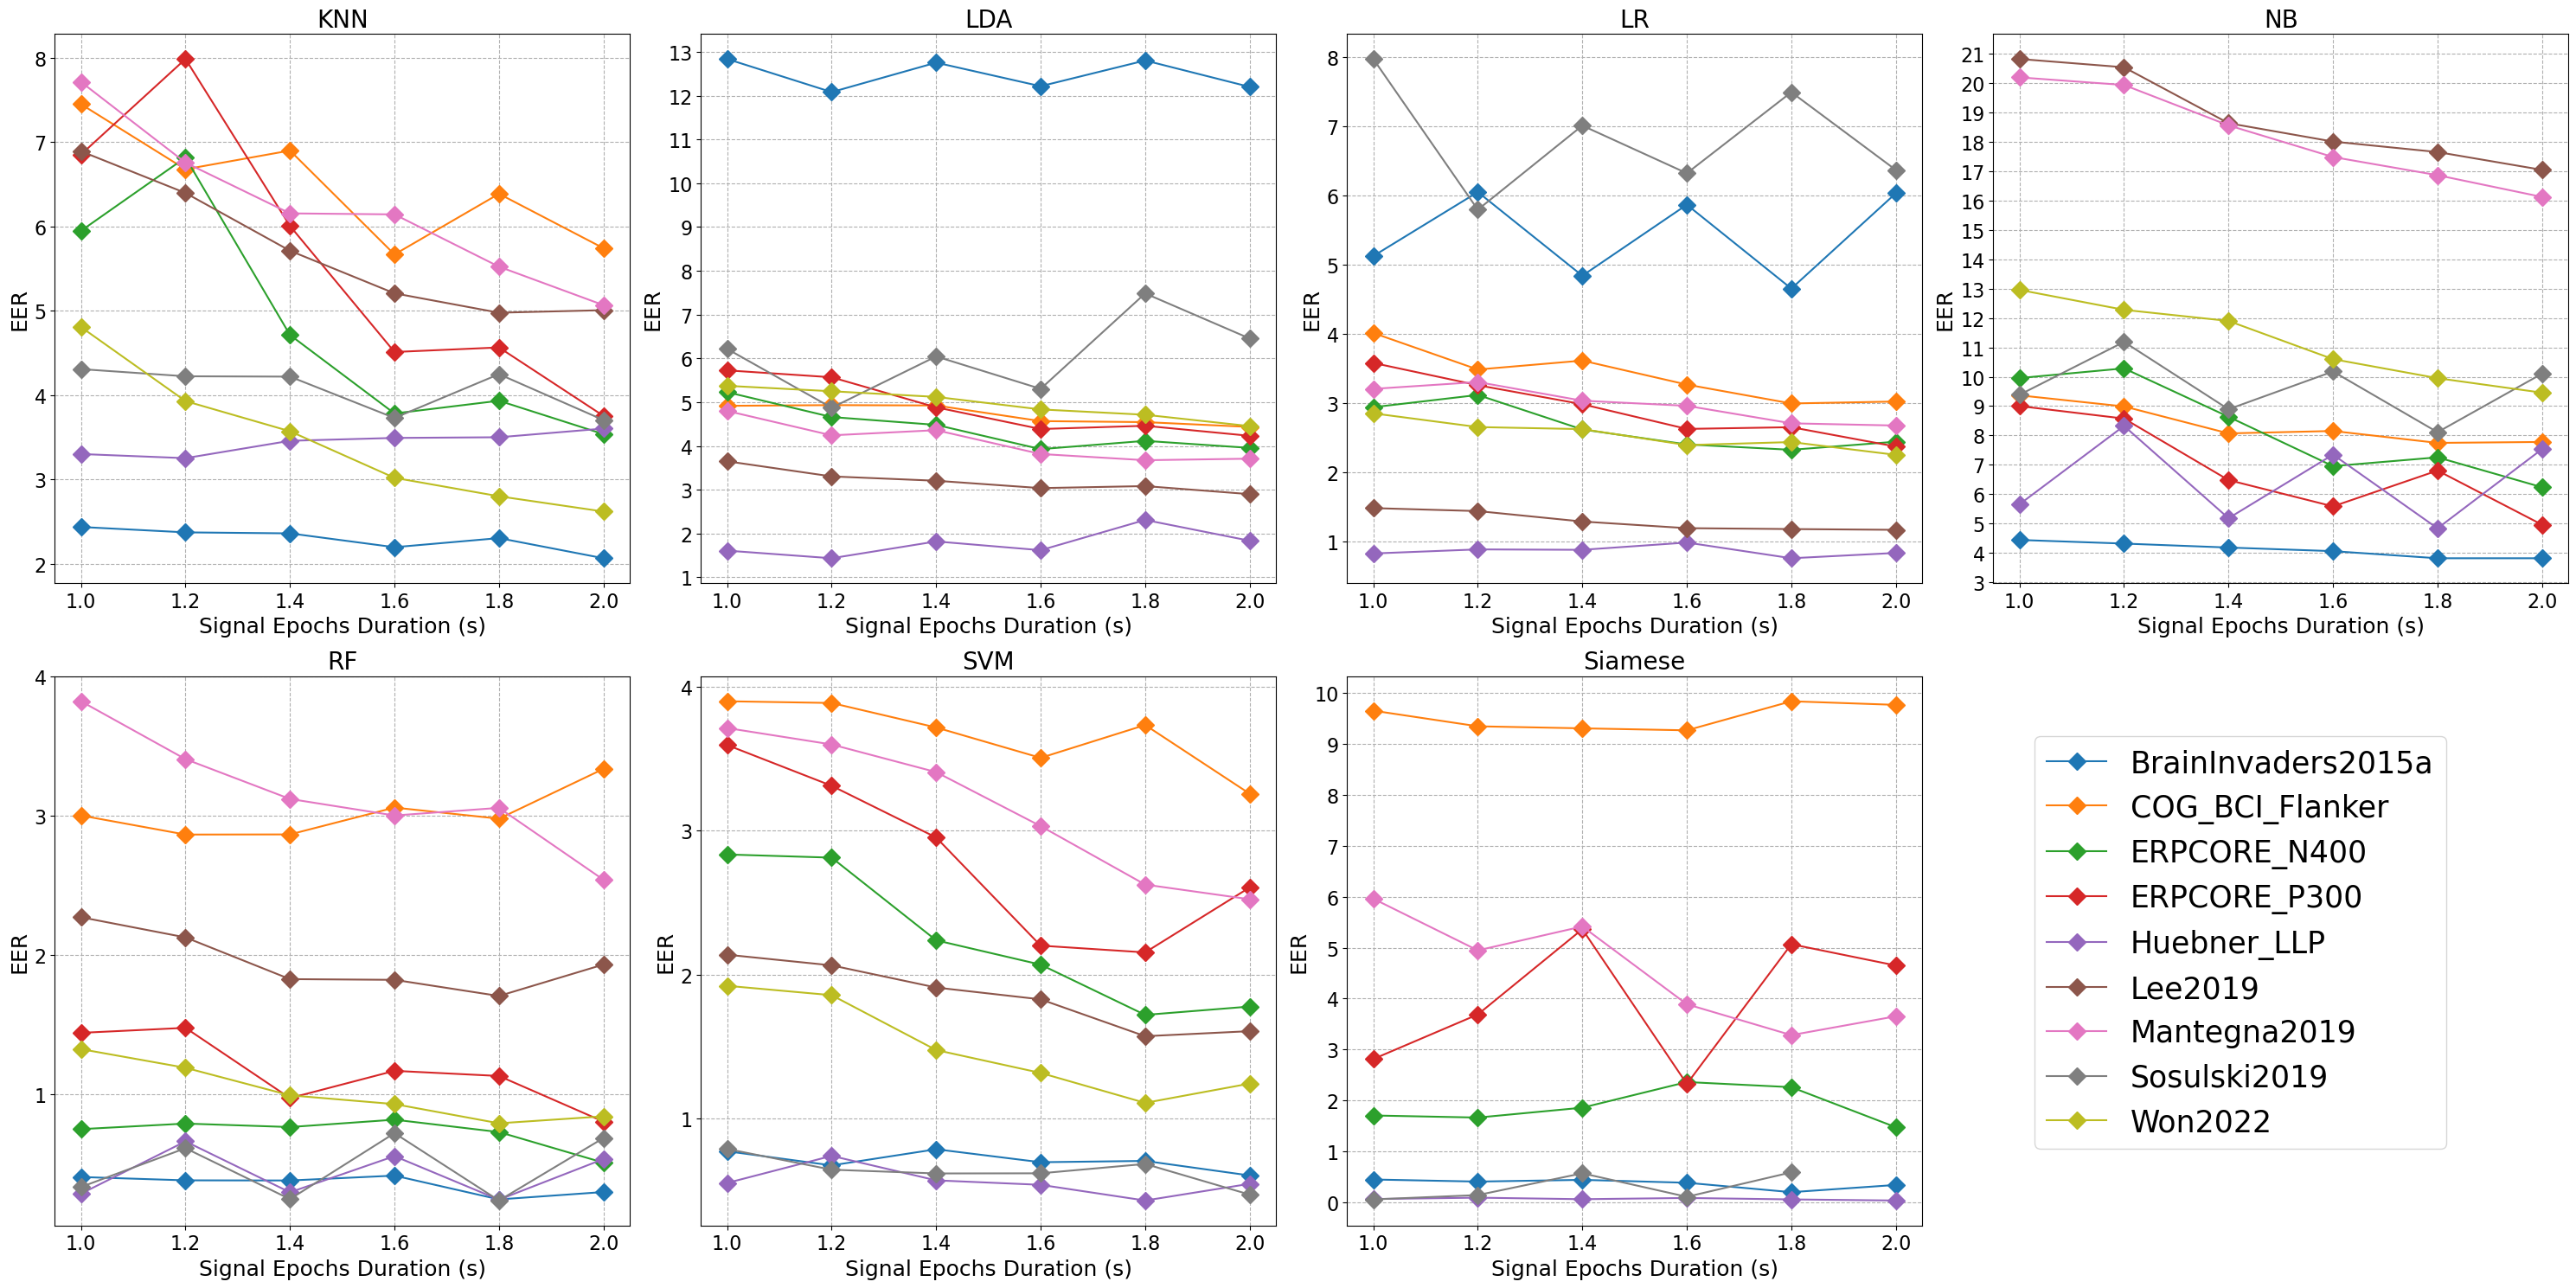

In [25]:
#import matplotlib.pyplot as plt

# Create subplots for each pipeline
fig, axs = plt.subplots(2, 4, figsize=(30, 15))
fig.tight_layout(pad=3.0)

# Flatten the 2D array of subplots for easy iteration
axs = axs.flatten()

# Create an empty list to store legend handles and labels
legend_handles = []

# Define dataset colors
dataset_colors = {
    'BrainInvaders2015a': 'blue',  # Dark blue
    'COG_BCI_Flanker': '#ff7f0e',  # Dark orange
    'ERPCORE_N400': '#DDCC77',  # Dark brown
    'ERPCORE_P300': '#e377c2',  # Dark pink
    'Huebner_LLP': '#2ca02c',  # Dark green
    'Lee2019': '#d62728',  # Dark red
    'Mantegna2019': '#7f7f7f',  # Dark gray
    'Sosulski2019': '#80b1d3',  # Dark purple
    'Won2022': '#bc80bd'  # Olive
}

legend_order = ["BrainInvaders2015a", "COG_BCI_Flanker", "ERPCORE_N400", "ERPCORE_P300", "Huebner_LLP", "Lee2019", "Mantegna2019", "Sosulski2019", "Won2022"]

# Iterate over each pipeline
for i, pipeline in enumerate(grouped_epochs_interval_df.pipeline.unique()):
    if i < len(axs):
        db = grouped_epochs_interval_df[grouped_epochs_interval_df['pipeline'] == pipeline]
        db['eer'] = db['eer'].astype('float64')

        # Choose the subplot for the current pipeline
        ax = axs[i]

        for dataset in legend_order:
            dataset_data = db[db['dataset'] == dataset]
            line, = ax.plot(dataset_data['epochs_duration'], dataset_data['eer'], marker='D', 
                            markersize=10, label=dataset)
            legend_handles.append(line)

        # Set labels and title
        ax.set_xlabel('Signal Epochs Duration (s)', fontsize=18)
        ax.set_ylabel('EER', fontsize=18)
        ax.set_title(pipeline, fontsize=20)

        # Increase the font size of x-axis and y-axis values
        ax.tick_params(axis='both', labelsize=16)

        # Set y-axis ticks at intervals of 1
        ax.yaxis.set_major_locator(plt.MultipleLocator(base=1))
        ax.grid(True, ls="--", lw=0.8)

# Create a legend outside the subplots
fig.legend(legend_handles, legend_order, bbox_to_anchor=(0.95, 0.44), fontsize=12, prop={'size': 25})
plt.subplots_adjust(right=0.80)  # Adjust layout to make room for the legend

# Adjust layout
plt.tight_layout()
fig.delaxes(axs[7])
plt.savefig('/Users/avinashkumarchaurasia/Desktop/project/BrainModels/Plots/Experiment_Pre_Processing/Epochs_Interval/Effects_of_Epochs_Duration.pdf', bbox_inches="tight")
plt.show()


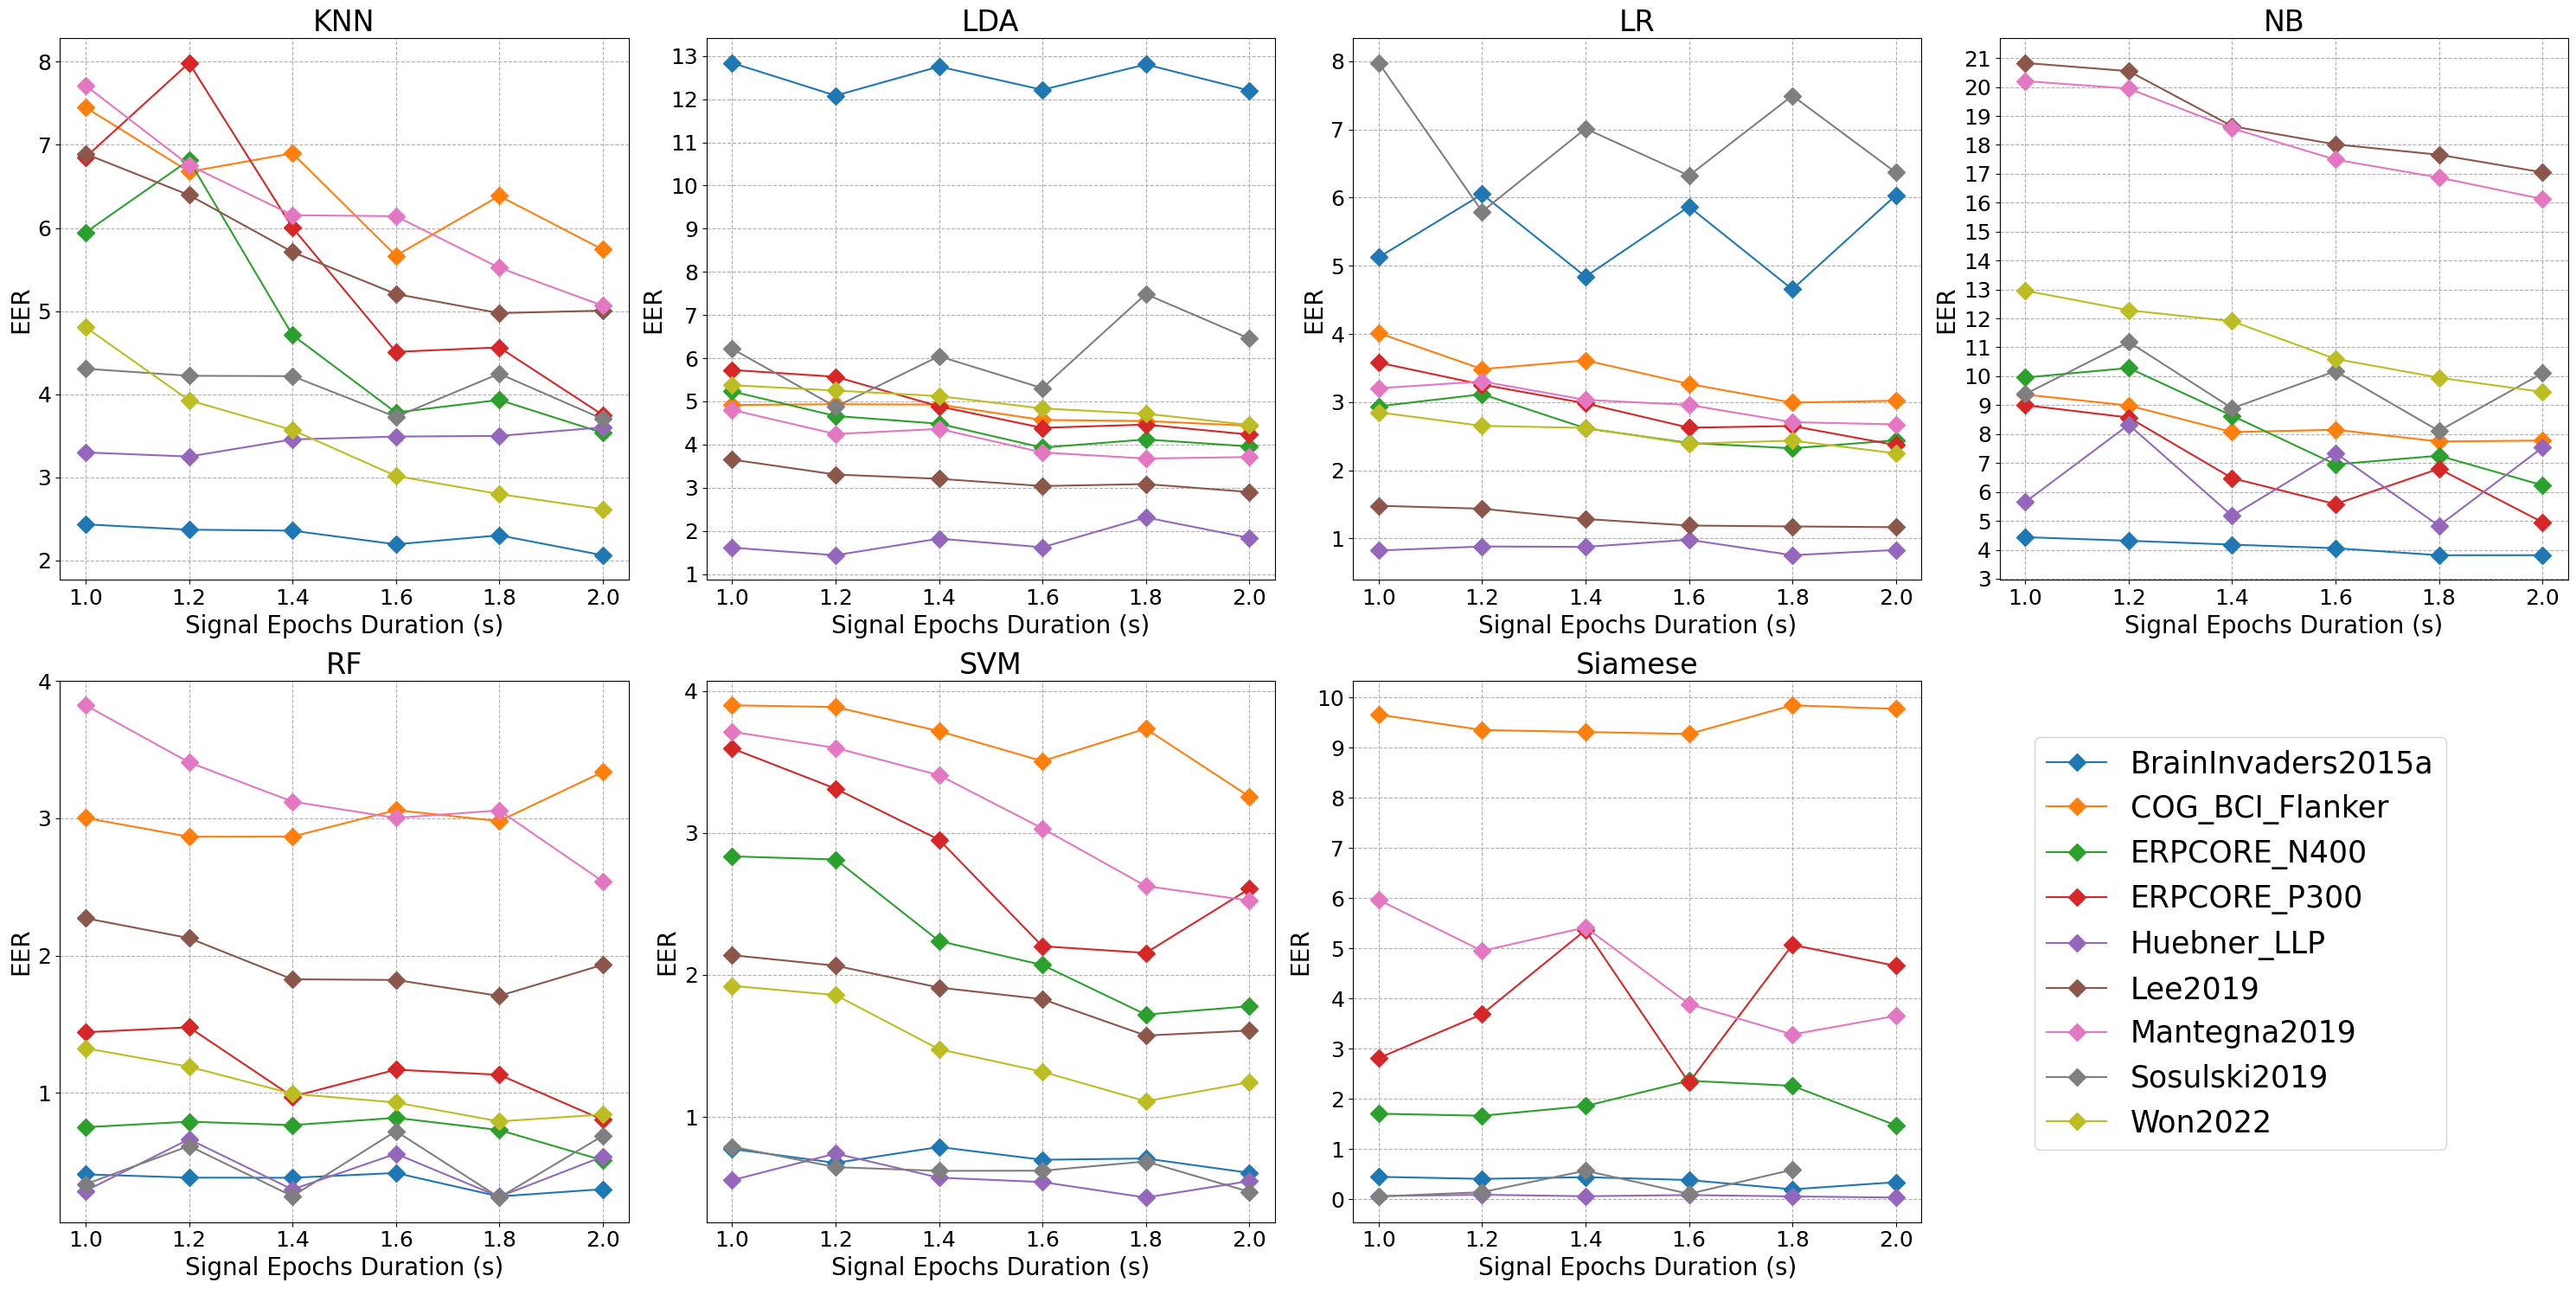

In [26]:
import matplotlib.pyplot as plt

# Create subplots for each pipeline
fig, axs = plt.subplots(2, 4, figsize=(30, 15))
fig.tight_layout(pad=3.0)

# Flatten the 2D array of subplots for easy iteration
axs = axs.flatten()

# Create an empty list to store legend handles and labels
legend_handles = []

# Define dataset colors
dataset_colors = {
    'BrainInvaders2015a': 'blue',  # Dark blue
    'COG_BCI_Flanker': '#ff7f0e',  # Dark orange
    'ERPCORE_N400': '#DDCC77',  # Dark brown
    'ERPCORE_P300': '#e377c2',  # Dark pink
    'Huebner_LLP': '#2ca02c',  # Dark green
    'Lee2019': '#d62728',  # Dark red
    'Mantegna2019': '#7f7f7f',  # Dark gray
    'Sosulski2019': '#80b1d3',  # Dark purple
    'Won2022': '#bc80bd'  # Olive
}

legend_order = ["BrainInvaders2015a", "COG_BCI_Flanker", "ERPCORE_N400", "ERPCORE_P300", "Huebner_LLP", "Lee2019", "Mantegna2019", "Sosulski2019", "Won2022"]

# Iterate over each pipeline
for i, pipeline in enumerate(grouped_epochs_interval_df.pipeline.unique()):
    if i < len(axs):
        db = grouped_epochs_interval_df[grouped_epochs_interval_df['pipeline'] == pipeline]
        db['eer'] = db['eer'].astype('float64')

        # Choose the subplot for the current pipeline
        ax = axs[i]

        for dataset in legend_order:
            dataset_data = db[db['dataset'] == dataset]
            line, = ax.plot(dataset_data['epochs_duration'], dataset_data['eer'], marker='D', 
                            markersize=10, label=dataset)
            legend_handles.append(line)

        # Set labels and title
        ax.set_xlabel('Signal Epochs Duration (s)', fontsize=20, color='black')
        ax.set_ylabel('EER', fontsize=20, color='black')
        ax.set_title(pipeline, fontsize=24)

        # Increase the font size of x-axis and y-axis values
        ax.tick_params(axis='both', labelsize=18, colors='black')

        # Set y-axis ticks at intervals of 1
        ax.yaxis.set_major_locator(plt.MultipleLocator(base=1))
        ax.grid(True, ls="--", lw=0.8)

# Create a legend outside the subplots
fig.legend(legend_handles, legend_order, bbox_to_anchor=(0.95, 0.44), fontsize=12, prop={'size': 25})
plt.subplots_adjust(right=0.80)  # Adjust layout to make room for the legend

# Adjust layout
plt.tight_layout()
fig.delaxes(axs[7])
plt.savefig('/Users/avinashkumarchaurasia/Desktop/project/BrainModels/Plots/Experiment_Pre_Processing/Epochs_Interval/Effects_of_Epochs_Duration.pdf', bbox_inches="tight")
plt.show()


================================================================================================================

<H1>Epochs Rejection</H1>

================================================================================================================


## Effects of Epochs Rejection


Under this Experiment, we analyze the effect of different epochs Rejection on the performance of our authentication systems across all the datasets. We tested the epochs Rejection such as 100, 150, 200, 250, 300, 350 and 400. Below Parameters were applied for conducting this experiment

<H3>Datasets</H3>

BrainInvaders15a, ERPCORE: N400, ERPCORE: N400, Mantegna2019, COG-BCI Flanker, Lee2019, Won2022,     Huebner2017, Sosulski2019

<H3>Utilized Parameters:</H3>

•   Filtering: Band Pass Filtering (1 to 50 Hz)

•   Epoch Interval: [-0.2, 0.8]

•   Baseline Correction Applied: Yes

•   Epochs Rejection threshold: 100, 150, 200, 250, 300, 350, 400

•   Features: AR (order=1), PSD

•   Classifiers: LDA, SVM, KNN, RF, NB, LR, Siamese 

•   Evaluation Type: Single-Session Evaluation

•   Threat Case: Open-Set

### Reading the results of dataset BrainInvaders15a

In [27]:
brain_epochsRejection_shallow_classifiers_db=pd.read_csv(os.path.join(brainInvaders_dir, 'Different_Epochs_Rejection', 'Shallow_Classifiers', 
                                                      'SOA_shallow_classifiers.csv'))
siamese_results_path=os.path.join(brainInvaders_dir, 'Different_Epochs_Rejection', 'Siamese_Results')
# List all files in the folder with a .csv extension
csv_files = [file for file in os.listdir(siamese_results_path) if file.endswith('.csv')]

# Initialize an empty list to store DataFrames
dfs = []

# Iterate over each CSV file and read it into a DataFrame
for csv_file in csv_files:
    file_path = os.path.join(siamese_results_path, csv_file)
    df = pd.read_csv(file_path)
    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
brain_siamese_df = pd.concat(dfs, ignore_index=True)                    

### Reading the results of dataset ERPCORE:N400

In [28]:
erpcCoreN400_epochsRejection_shallow_classifiers_db=pd.read_csv(os.path.join(ERPCORE_N400_dir, 'Different_Epochs_Rejection', 'Shallow_Classifiers', 
                                                      'SOA_shallow_classifiers.csv'))

siamese_results_path=os.path.join(ERPCORE_N400_dir, 'Different_Epochs_Rejection', 'Siamese_Results')
# List all files in the folder with a .csv extension
csv_files = [file for file in os.listdir(siamese_results_path) if file.endswith('.csv')]

# Initialize an empty list to store DataFrames
dfs = []

# Iterate over each CSV file and read it into a DataFrame
for csv_file in csv_files:
    file_path = os.path.join(siamese_results_path, csv_file)
    df = pd.read_csv(file_path)
    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
erpCore_N400_siamese_df = pd.concat(dfs, ignore_index=True) 

### Reading the results of dataset ERPCORE:P300

In [29]:
erpcCoreP300_epochsRejection_shallow_classifiers_db=pd.read_csv(os.path.join(ERPCORE_P300_dir, 'Different_Epochs_Rejection', 'Shallow_Classifiers', 
                                                      'SOA_shallow_classifiers.csv'))

siamese_results_path=os.path.join(ERPCORE_P300_dir, 'Different_Epochs_Rejection', 'Siamese_Results')
# List all files in the folder with a .csv extension
csv_files = [file for file in os.listdir(siamese_results_path) if file.endswith('.csv')]

# Initialize an empty list to store DataFrames
dfs = []

# Iterate over each CSV file and read it into a DataFrame
for csv_file in csv_files:
    file_path = os.path.join(siamese_results_path, csv_file)
    df = pd.read_csv(file_path)
    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
erpCore_P300_siamese_df = pd.concat(dfs, ignore_index=True) 

### Reading the results of dataset COGBCI-Flanker

In [30]:
cogbci_epochsRejection_shallow_classifiers_db=pd.read_csv(os.path.join(COG_BCI_Flanker_dir, 'Different_Epochs_Rejection', 'Shallow_Classifiers', 
                                                      'SOA_shallow_classifiers.csv'))

siamese_results_path=os.path.join(COG_BCI_Flanker_dir, 'Different_Epochs_Rejection', 'Siamese_Results')
# List all files in the folder with a .csv extension

print(os.listdir(siamese_results_path))
csv_files = [file for file in os.listdir(siamese_results_path) if file.endswith('.csv')]

# Initialize an empty list to store DataFrames
dfs = []

# Iterate over each CSV file and read it into a DataFrame
for csv_file in csv_files:
    file_path = os.path.join(siamese_results_path, csv_file)
    df = pd.read_csv(file_path)
    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
cogbci_siamese_df = pd.concat(dfs, ignore_index=True) 

['no_threshold_Results.csv', '200_threshold_Results.csv', '250_threshold_Results.csv', '100_threshold_Results.csv', '400_threshold_Results.csv', '350_threshold_Results.csv']


### Reading the results of dataset  Huebner2017

In [31]:
huebner_epochsRejection_shallow_classifiers_db=pd.read_csv(os.path.join(Huebner_LLP_dir, 'Different_Epochs_Rejection', 'Shallow_Classifiers', 
                                                      'SOA_shallow_classifiers.csv'))

siamese_results_path=os.path.join(Huebner_LLP_dir, 'Different_Epochs_Rejection', 'Siamese_Results')
# List all files in the folder with a .csv extension
csv_files = [file for file in os.listdir(siamese_results_path) if file.endswith('.csv')]

# Initialize an empty list to store DataFrames
dfs = []

# Iterate over each CSV file and read it into a DataFrame
for csv_file in csv_files:
    file_path = os.path.join(siamese_results_path, csv_file)
    df = pd.read_csv(file_path)
    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
huebner_siamese_df = pd.concat(dfs, ignore_index=True)
#huebner_siamese_df

### Reading the results of dataset Sosulski2019

In [32]:
Soluski_epochsRejection_shallow_classifiers_db=pd.read_csv(os.path.join(Sosulski2019_dir, 'Different_Epochs_Rejection', 'Shallow_Classifiers', 
                                                      'SOA_shallow_classifiers.csv'))

siamese_results_path=os.path.join(Sosulski2019_dir, 'Different_Epochs_Rejection', 'Siamese_Results')
# List all files in the folder with a .csv extension
csv_files = [file for file in os.listdir(siamese_results_path) if file.endswith('.csv')]

# Initialize an empty list to store DataFrames
dfs = []

# Iterate over each CSV file and read it into a DataFrame
for csv_file in csv_files:
    file_path = os.path.join(siamese_results_path, csv_file)
    df = pd.read_csv(file_path)
    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
sosulski_siamese_df = pd.concat(dfs, ignore_index=True) 

### Reading the results of dataset Mantegna2019

In [33]:
mantegna_epochsRejection_shallow_classifiers_db=pd.read_csv(os.path.join(Mantegna2019_dir, 'Different_Epochs_Rejection', 'Shallow_Classifiers', 
                                                      'SOA_shallow_classifiers.csv'))

siamese_results_path=os.path.join(Mantegna2019_dir, 'Different_Epochs_Rejection', 'Siamese_Results')
# List all files in the folder with a .csv extension
csv_files = [file for file in os.listdir(siamese_results_path) if file.endswith('.csv')]

# Initialize an empty list to store DataFrames
dfs = []

# Iterate over each CSV file and read it into a DataFrame
for csv_file in csv_files:
    file_path = os.path.join(siamese_results_path, csv_file)
    df = pd.read_csv(file_path)
    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
mantgena_siamese_df = pd.concat(dfs, ignore_index=True) 

### Reading the results of dataset Won2022

In [34]:
won2022_epochsRejection_shallow_classifiers_db=pd.read_csv(os.path.join(Won2022_dir, 'Different_Epochs_Rejection', 'Shallow_Classifiers', 
                                                      'SOA_shallow_classifiers.csv'))

siamese_results_path=os.path.join(Won2022_dir, 'Different_Epochs_Rejection', 'Siamese_Results')
# List all files in the folder with a .csv extension
csv_files = [file for file in os.listdir(siamese_results_path) if file.endswith('.csv')]

# Initialize an empty list to store DataFrames
dfs = []

# Iterate over each CSV file and read it into a DataFrame
for csv_file in csv_files:
    file_path = os.path.join(siamese_results_path, csv_file)
    df = pd.read_csv(file_path)
    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
won2022_siamese_df = pd.concat(dfs, ignore_index=True) 

### Reading the results of Lee2019 

In [35]:
lee_epochsRejection_shallow_classifiers_db=pd.read_csv(os.path.join(lee2019_dir, 'Different_Epochs_Rejection', 'Shallow_Classifiers', 
                                                      'SOA_shallow_classifiers.csv'))

# siamese_results_path=os.path.join(Won2022_dir, 'Different_Epochs_Rejection', 'Siamese_Results')
# # List all files in the folder with a .csv extension
# csv_files = [file for file in os.listdir(siamese_results_path) if file.endswith('.csv')]

# # Initialize an empty list to store DataFrames
# dfs = []

# # Iterate over each CSV file and read it into a DataFrame
# for csv_file in csv_files:
#     file_path = os.path.join(siamese_results_path, csv_file)
#     df = pd.read_csv(file_path)
#     dfs.append(df)

# # Concatenate all DataFrames into a single DataFrame
# won2022_siamese_df = pd.concat(dfs, ignore_index=True) 

In [36]:
df_epochs_rejection_db=pd.concat([brain_epochsRejection_shallow_classifiers_db, brain_siamese_df,
                                  erpcCoreN400_epochsRejection_shallow_classifiers_db, erpCore_N400_siamese_df,
                                    erpcCoreP300_epochsRejection_shallow_classifiers_db, erpCore_P300_siamese_df,
                                    cogbci_epochsRejection_shallow_classifiers_db, cogbci_siamese_df,
                                  huebner_epochsRejection_shallow_classifiers_db, huebner_siamese_df, 
                                      Soluski_epochsRejection_shallow_classifiers_db, sosulski_siamese_df,
                                    mantegna_epochsRejection_shallow_classifiers_db, mantgena_siamese_df, 
                                  won2022_epochsRejection_shallow_classifiers_db,won2022_siamese_df, 
                                 lee_epochsRejection_shallow_classifiers_db], axis=0)

In [37]:
#df_epochs_rejection_db

In [38]:
df_epochs_rejection_db.drop(columns=['evaluation', 'Unnamed: 0'], inplace=True)
df_epochs_rejection_db['pipeline'] = df_epochs_rejection_db['pipeline'].apply(lambda x: x.split('+')[-1])
df_epochs_rejection_db['pipeline'].replace({'siamese':'Siamese'}, inplace=True)
df_epochs_rejection_db['dataset'].replace({'Visual Speller LLP': "Huebner2017", 'Spot Pilot P300 dataset':'Sosulski2019'}, inplace=True)

### Grouping the results of Epochs Rejection

In [39]:
#df_sample_size.head()
grouped_epochs_rejection_df=df_epochs_rejection_db.copy()
grouped_epochs_rejection_df['eer_std'] = df_epochs_rejection_db['eer'].std()
#print(grouped_epochs_rejection_df)
grouped_epochs_rejection_df=grouped_epochs_rejection_df.groupby(['dataset', 'pipeline','Rejection_Threshold']).agg({
                #'accuracy': 'mean',
                'eer': lambda x: f'{np.mean(x)*100:.3f}',
                'eer_std':lambda x: f'{np.std(x)*100:.3f}',
                'frr_1_far': lambda x: f'{np.mean(x)*100:.3f}',
                'frr_0.1_far': lambda x: f'{np.mean(x)*100:.3f}',
                'frr_0.01_far': lambda x: f'{np.mean(x)*100:.3f}'
            }).reset_index()

#grouped_df

In [40]:
#grouped_epochs_rejection_df[grouped_epochs_rejection_df['pipeline']=='siamese']['dataset'].unique()
grouped_epochs_rejection_df['Rejection_Threshold'].replace(0, 450, inplace=True)
grouped_epochs_rejection_df=grouped_epochs_rejection_df.sort_values(by=['dataset', 'Rejection_Threshold'])

In [41]:
grouped_epochs_rejection_df[grouped_epochs_rejection_df['pipeline']=='Siamese']['dataset'].unique()

array(['Brain Invaders 2015a', 'COG-BCI Flanker', 'Huebner2017',
       'Sosulski2019', 'erpcore n400', 'erpcore p300', 'mantegna 2019',
       'won 2022'], dtype=object)

In [42]:
grouped_epochs_rejection_df['dataset'].replace({'Brain Invaders 2015a': 'BrainInvaders2015a',
                                              'COG-BCI Flanker': 'COG_BCI_Flanker',
                                               'Huebner2017': 'Huebner_LLP',
                                               'Lee2019_ERP': 'Lee2019',
                                               'erpcore n400': 'ERPCORE_N400',
                                               'erpcore p300': 'ERPCORE_P300',
                                               'mantegna 2019':'Mantegna2019',
                                               'won 2022': 'Won2022'}, inplace=True)

In [43]:
#grouped_epochs_rejection_df[grouped_epochs_rejection_df['pipeline']=='KNN'][0:60]

In [44]:
#grouped_epochs_rejection_df=grouped_epochs_rejection_df[grouped_epochs_rejection_df.Rejection_Threshold!=100]
#grouped_epochs_rejection_df[grouped_epochs_rejection_df['pipeline']=='Siamese']

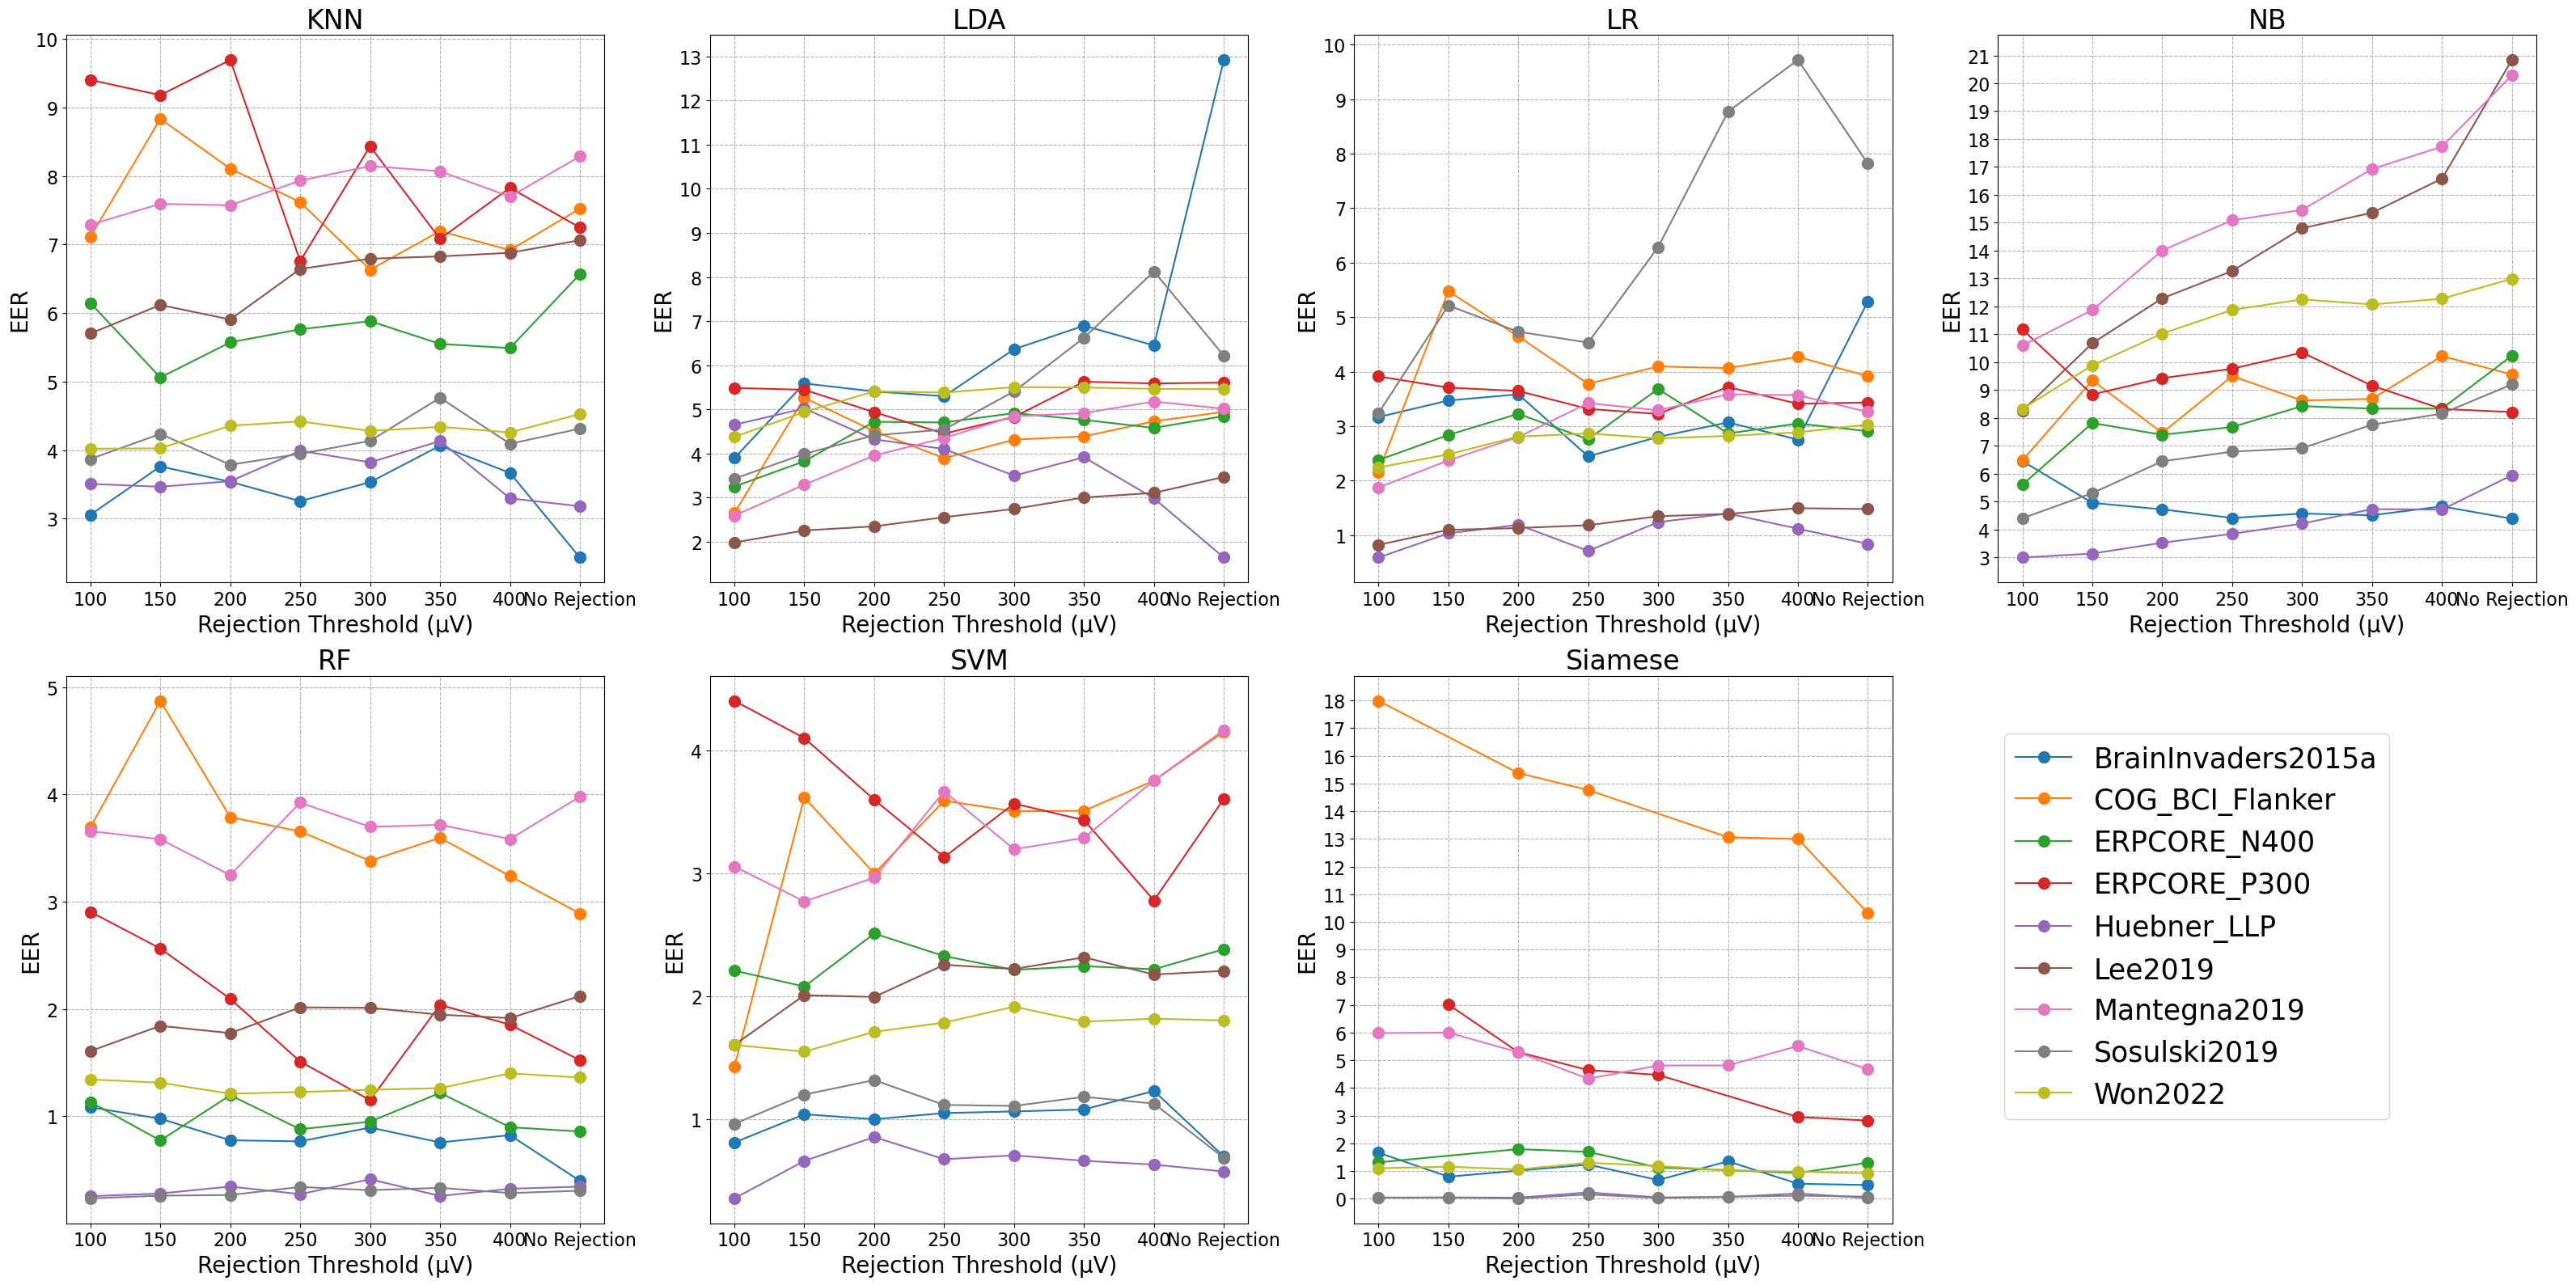

In [65]:
#import matplotlib.pyplot as plt

# Create subplots for each pipeline
fig, axs = plt.subplots(2,4, figsize=(32, 16))
fig.tight_layout(pad=3.0)

#print(fig.)

# Flatten the 2D array of subplots for easy iteration
axs = axs.flatten()

# Create an empty list to store legend handles and labels
legend_handles = []

# Define dataset colors
dataset_colors = {
    'BrainInvaders2015a': 'blue',  # Dark blue
    'COG_BCI_Flanker': '#ff7f0e',  # Dark orange
    'ERPCORE_N400': '#DDCC77',  # Dark brown
    'ERPCORE_P300': '#e377c2',  # Dark pink
    'Huebner_LLP': '#2ca02c',  # Dark green
    'Lee2019': '#d62728',  # Dark red
    'Mantegna2019': '#7f7f7f',  # Dark gray
    'Sosulski2019': '#80b1d3',  # Dark purple
    'Won2022': '#bc80bd'  # Olive
}

legend_order = ["BrainInvaders2015a", "COG_BCI_Flanker", "ERPCORE_N400", "ERPCORE_P300", "Huebner_LLP", "Lee2019", "Mantegna2019", "Sosulski2019", "Won2022"]

# Iterate over each pipeline
for i, pipeline in enumerate(grouped_epochs_rejection_df.pipeline.unique()):
    if i < len(axs):
        db = grouped_epochs_rejection_df[grouped_epochs_rejection_df['pipeline'] == pipeline]
        db['eer'] = db['eer'].astype('float64')

        # Choose the subplot for the current pipeline
        ax = axs[i]

        for dataset in legend_order:
            #print("dataset", dataset)
            
#             # Check if there are enough subplots for the pipelines
#             print("dataset", dataset)
#             print("dataset color", dataset_colors[dataset])
#             print("============================================")
            dataset_data = db[db['dataset'] == dataset]
            line, = ax.plot(dataset_data['Rejection_Threshold'], dataset_data['eer'], marker='o', 
                    markersize=10, label=dataset)
            #print(line)
            legend_handles.append(line)
            
#             # Add error bars to the line plot
#             ax.errorbar(dataset_data['Rejection_Threshold'], dataset_data['eer'], yerr=dataset_data['eer'], fmt='none', capsize=8)

        # Set labels and title

        # Set labels and title
        ax.set_xlabel('Rejection Threshold (µV)', fontsize=20)
        ax.set_ylabel('EER', fontsize=20)
        ax.set_title(pipeline, fontsize=24)
        
        ax.tick_params(axis='both', labelsize=15, colors='black')
        
        
        # Modify x-axis ticks
        ax.set_xticks([100, 150, 200, 250, 300, 350, 400, 450])
        ax.set_xticklabels([100, 150, 200, 250, 300, 350, 400, "No Rejection"])
        
#         ax.set_ylim(0, 10)
#         ax.set_yticks(range(0, 11, 1))

        # Set y-axis ticks at intervals of 1
        ax.yaxis.set_major_locator(plt.MultipleLocator(base=1))
        ax.grid(True, ls="--", lw=0.8)
        
#print(set(grouped_epochs_rejection_df['dataset']))

# Create a legend outside the subplots
fig.legend(legend_handles, legend_order, bbox_to_anchor=(0.93, 0.44), fontsize=12, prop={'size': 25})
plt.subplots_adjust(right=0.80) 
# Adjust layout to make room for the legend

# Adjust layout
plt.tight_layout()
fig.delaxes(axs[7])
plt.savefig('/Users/avinashkumarchaurasia/Desktop/project/BrainModels/Plots/Experiment_Pre_Processing/Epochs_Rejection/Effects_of_Epochs_rejection.pdf', bbox_inches="tight")
plt.show()

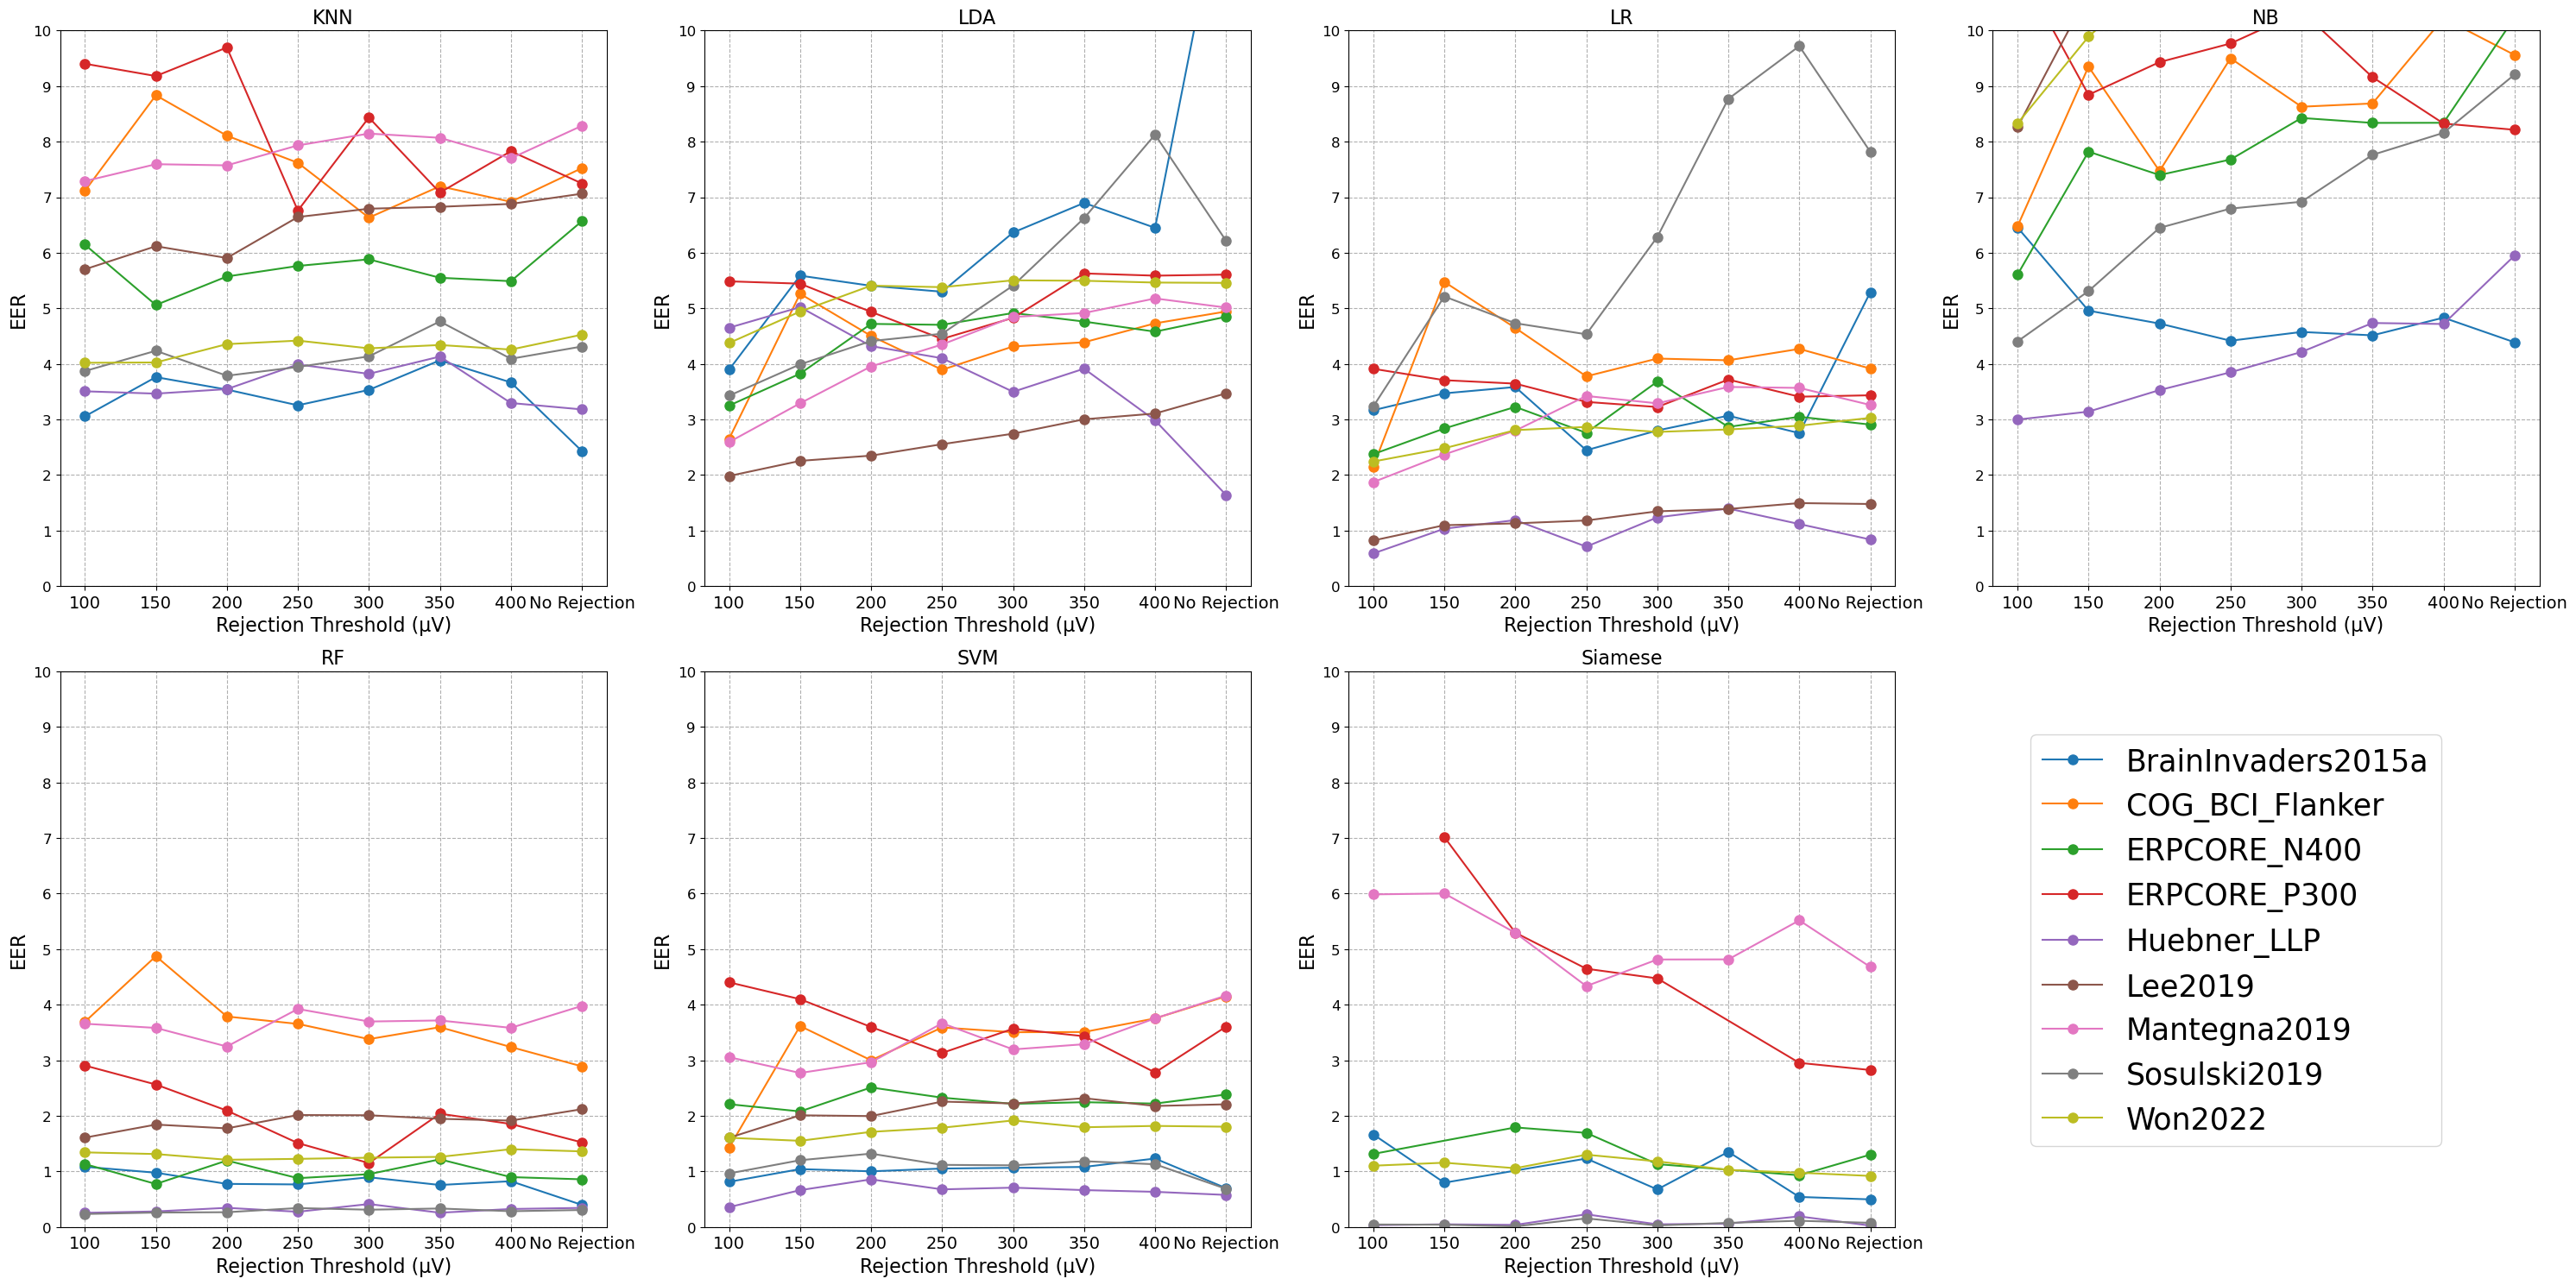

In [46]:
#import matplotlib.pyplot as plt

# Create subplots for each pipeline
# Create subplots for each pipeline with larger subplots
fig, axs = plt.subplots(2, 4, figsize=(30, 15))
fig.tight_layout(pad=5.0)  # Increase the padding between subplots

# Flatten the 2D array of subplots for easy iteration
axs = axs.flatten()

# Create an empty list to store legend handles and labels
legend_handles = []

# Define dataset colors
dataset_colors = {
    'BrainInvaders2015a': 'blue',  # Dark blue
    'COG_BCI_Flanker': '#ff7f0e',  # Dark orange
    'ERPCORE_N400': '#DDCC77',  # Dark brown
    'ERPCORE_P300': '#e377c2',  # Dark pink
    'Huebner_LLP': '#2ca02c',  # Dark green
    'Lee2019': '#d62728',  # Dark red
    'Mantegna2019': '#7f7f7f',  # Dark gray
    'Sosulski2019': '#80b1d3',  # Dark purple
    'Won2022': '#bc80bd'  # Olive
}

legend_order = ["BrainInvaders2015a", "COG_BCI_Flanker", "ERPCORE_N400", "ERPCORE_P300", "Huebner_LLP", "Lee2019", "Mantegna2019", "Sosulski2019", "Won2022"]

# Iterate over each pipeline
for i, pipeline in enumerate(grouped_epochs_rejection_df.pipeline.unique()):
    if i < len(axs):
        db = grouped_epochs_rejection_df[grouped_epochs_rejection_df['pipeline'] == pipeline]
        db['eer'] = db['eer'].astype('float64')

        # Choose the subplot for the current pipeline
        ax = axs[i]

        for dataset in legend_order:
            dataset_data = db[db['dataset'] == dataset]
            line, = ax.plot(dataset_data['Rejection_Threshold'], dataset_data['eer'], marker='o', 
                            markersize=8, label=dataset)
            legend_handles.append(line)

        # Set labels and title
        ax.set_xlabel('Rejection Threshold (µV)', fontsize=16, color='black')
        ax.set_ylabel('EER', fontsize=16, color='black')
        ax.set_title(pipeline, fontsize=16)
        
        # Modify x-axis ticks
        ax.set_xticks([100, 150, 200, 250, 300, 350, 400, 450])
        ax.set_xticklabels([100, 150, 200, 250, 300, 350, 400, "No Rejection"], color='black', fontsize=14)
        
        ax.set_ylim(0, 10)
        ax.set_yticks(range(0, 11, 1))
        
        #Modify y-axis ticks
        ax.set_yticklabels(range(0, 11, 1), color='black', fontsize=12)

        # Set y-axis ticks at intervals of 1
        ax.yaxis.set_major_locator(plt.MultipleLocator(base=1))
        ax.grid(True, ls="--", lw=0.8)
        
# Create a legend outside the subplots
fig.legend(legend_handles, legend_order, bbox_to_anchor=(0.95, 0.44), fontsize=12, prop={'size': 25})
plt.subplots_adjust(right=0.80) 
# Adjust layout to make room for the legend

# Adjust layout
plt.tight_layout()
fig.delaxes(axs[7])

#plt.savefig('/Users/avinashkumarchaurasia/Desktop/project/BrainModels/Plots/Experiment_Pre_Processing/Epochs_Rejection/Effects_of_Epochs_rejection.pdf', bbox_inches="tight")

plt.show()


### Visualzing all the EER of Eochs Rejection in subplots

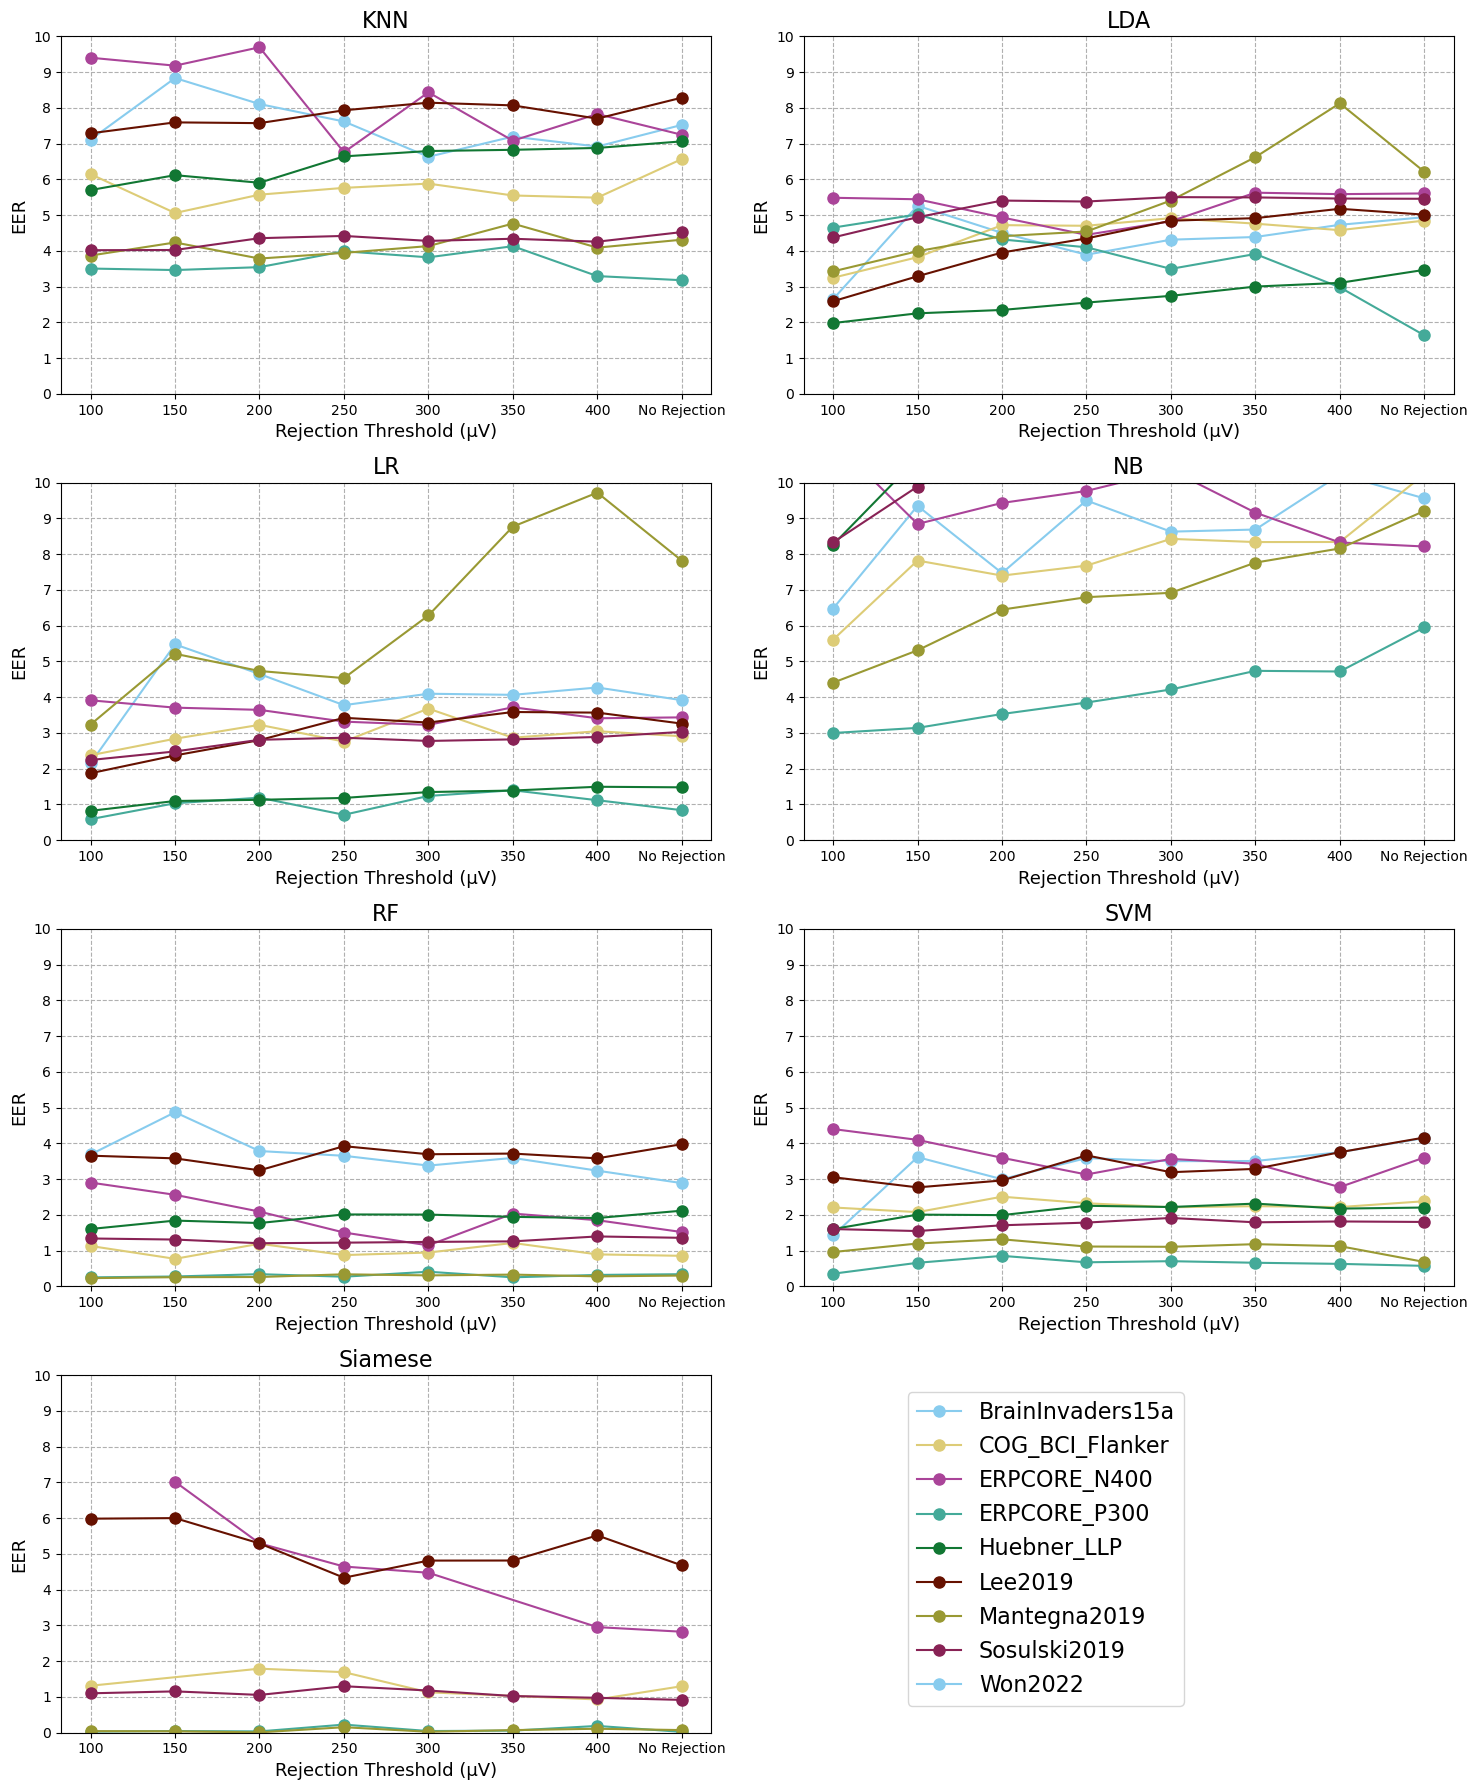

In [47]:
import matplotlib.pyplot as plt

# Define dataset colors
dataset_colors = {
    'BrainInvaders15a': '#332288',
    'COG_BCI_Flanker': '#88CCEE',
    'Huebner_LLP': '#44AA99',
    'Lee2019': '#117733',
    'Sosulski2019': '#999933',
    'ERPCORE_N400': '#DDCC77',
    'ERPCORE_P300': '#AA4499',
    'Mantegna2019': '#661100',
    'Won2022': '#882255'
}

# Create subplots for each pipeline
fig, axs = plt.subplots(4, 2, figsize=(15, 18))
fig.tight_layout(pad=3.0)

# Flatten the 2D array of subplots for easy iteration
axs = axs.flatten()

# Create an empty list to store legend handles and labels
legend_handles = []

# Define legend order
legend_order = ["BrainInvaders15a", "COG_BCI_Flanker", "ERPCORE_N400", "ERPCORE_P300", "Huebner_LLP", "Lee2019", "Mantegna2019", "Sosulski2019", "Won2022"]

# Iterate over each pipeline
for i, pipeline in enumerate(grouped_epochs_rejection_df.pipeline.unique()):
    # Check if there are enough subplots for the pipelines
    if i < len(axs):
        db = grouped_epochs_rejection_df[grouped_epochs_rejection_df['pipeline'] == pipeline]
        db['eer'] = db['eer'].astype('float64')

        # Choose the subplot for the current pipeline
        ax = axs[i]

        for dataset in legend_order:
            if dataset in set(db['dataset']):
                dataset_data = db[db['dataset'] == dataset]
                line, = ax.plot(
                    dataset_data['Rejection_Threshold'], 
                    dataset_data['eer'], 
                    marker='o', 
                    markersize=8, 
                    label=dataset, 
                    color=dataset_colors[dataset]
                )
                legend_handles.append(line)

        # Set labels and title
        ax.set_xlabel('Rejection Threshold (µV)', fontsize=13)
        ax.set_ylabel('EER', fontsize=13)

        # Modify x-axis ticks
        ax.set_xticks([100, 150, 200, 250, 300, 350, 400, 450])
        ax.set_xticklabels([100, 150, 200, 250, 300, 350, 400, "No Rejection"])

        ax.set_ylim(0, 10)
        ax.set_yticks(range(0, 11, 1))

        ax.set_title(pipeline, fontsize=16)

        # Set y-axis ticks at intervals of 1
        ax.yaxis.set_major_locator(plt.MultipleLocator(base=1))
        ax.grid(True, ls="--", lw=0.8)

# Create a legend outside the subplots
fig.legend(legend_handles, legend_order, loc='upper right', bbox_to_anchor=(0.8, 0.23), fontsize=12, prop={'size': 16})
plt.subplots_adjust(right=0.60)  # Adjust layout to make room for the legend

# Adjust layout
plt.tight_layout()
fig.delaxes(axs[7])
plt.show()


In [48]:
import matplotlib.pyplot as plt

# Define dataset colors
dataset_colors = {
    'BrainInvaders15a': '#1f77b4',  # Dark blue
    'COG_BCI_Flanker': '#ff7f0e',  # Dark orange
    'Huebner_LLP': '#2ca02c',  # Dark green
    'Lee2019': '#d62728',  # Dark red
    'Sosulski2019': '#8dd3c7',  # Dark purple
    'ERPCORE_N400': '#8c564b',  # Dark brown
    'ERPCORE_P300': '#e377c2',  # Dark pink
    'Mantegna2019': '#7f7f7f',  # Dark gray
    'Won2022': '#8dd3c7'  # Olive
}

# Create subplots for each pipeline
fig, axs = plt.subplots(4, 2, figsize=(15, 18))
fig.tight_layout(pad=3.0)

# Flatten the 2D array of subplots for easy iteration
axs = axs.flatten()

# Create an empty list to store legend handles and labels
legend_handles = []

# Define legend order
legend_order = ["BrainInvaders15a", "COG_BCI_Flanker", "ERPCORE_N400", "ERPCORE_P300", "Huebner_LLP", "Lee2019", "Mantegna2019", "Sosulski2019", "Won2022"]

# Iterate over each pipeline
for i, pipeline in enumerate(grouped_epochs_rejection_df.pipeline.unique()):
    # Check if there are enough subplots for the pipelines
    if i < len(axs):
        db = grouped_epochs_rejection_df[grouped_epochs_rejection_df['pipeline'] == pipeline]
        db['eer'] = db['eer'].astype('float64')

        # Choose the subplot for the current pipeline
        ax = axs[i]

        for dataset in legend_order:
            if dataset in set(db['dataset']):
                dataset_data = db[db['dataset'] == dataset]
                line, = ax.plot(
                    dataset_data['Rejection_Threshold'], 
                    dataset_data['eer'], 
# #                     marker='o', 
#                     markersize=8, 
                    label=dataset,  
                    color=dataset_colors[dataset]
                )
                legend_handles.append(line)

        # Set labels and title
        ax.set_xlabel('Rejection Threshold (µV)', fontsize=13)
        ax.set_ylabel('EER', fontsize=13)

        # Modify x-axis ticks
        ax.set_xticks([100, 150, 200, 250, 300, 350, 400, 450])
        ax.set_xticklabels([100, 150, 200, 250, 300, 350, 400, "No Rejection"])

#         ax.set_ylim(0, 10)
#         ax.set_yticks(range(0, 10, 1))

        ax.set_title(pipeline, fontsize=16)

        # Set y-axis ticks at intervals of 1
        ax.yaxis.set_major_locator(plt.MultipleLocator(base=1))
        ax.grid(True, ls="--", lw=0.8)

# Create a legend outside the subplots
fig.legend(legend_handles, legend_order, loc='upper right', bbox_to_anchor=(0.8, 0.23), fontsize=12, prop={'size': 16})
plt.subplots_adjust(right=0.60)  # Adjust layout to make room for the legend

# Adjust layout
plt.tight_layout()
fig.delaxes(axs[7])
plt.show()


In [49]:
import matplotlib.pyplot as plt

# Define dataset colors
dataset_colors = {
    'BrainInvaders15a': '#1f77b4',  # Dark blue
    'COG_BCI_Flanker': '#ff7f0e',  # Dark orange
    'Huebner_LLP': '#2ca02c',  # Dark green
    'Lee2019': '#d62728',  # Dark red
    'Sosulski2019': '#9467bd',  # Dark purple
    'ERPCORE_N400': '#8c564b',  # Dark brown
    'ERPCORE_P300': '#e377c2',  # Dark pink
    'Mantegna2019': '#7f7f7f',  # Dark gray
    'Won2022': '#bcbd22'  # Olive
}

# Create subplots for each pipeline
fig, axs = plt.subplots(4, 2, figsize=(15, 18))
fig.tight_layout(pad=3.0)

# Flatten the 2D array of subplots for easy iteration
axs = axs.flatten()

# Create an empty list to store legend handles and labels
legend_handles = []

# Define legend order
legend_order = ["BrainInvaders15a", "COG_BCI_Flanker", "ERPCORE_N400", "ERPCORE_P300", "Huebner_LLP", "Lee2019", "Mantegna2019", "Sosulski2019", "Won2022"]

# Iterate over each pipeline
for i, pipeline in enumerate(grouped_epochs_rejection_df.pipeline.unique()):
    # Check if there are enough subplots for the pipelines
    if i < len(axs):
        db = grouped_epochs_rejection_df[grouped_epochs_rejection_df['pipeline'] == pipeline]
        db['eer'] = db['eer'].astype('float64')

        # Choose the subplot for the current pipeline
        ax = axs[i]

        for dataset in legend_order:
            if dataset in set(db['dataset']):
                dataset_data = db[db['dataset'] == dataset]
                line, = ax.plot(
                    dataset_data['Rejection_Threshold'], 
                    dataset_data['eer'], 
                    marker='o', 
                    markersize=8, 
                    label=dataset, 
                    color=dataset_colors[dataset]
                )
                legend_handles.append(line)

        # Set labels and title
        ax.set_xlabel('Rejection Threshold (µV)', fontsize=13)
        ax.set_ylabel('EER', fontsize=13)

        # Modify x-axis ticks
        ax.set_xticks([100, 150, 200, 250, 300, 350, 400, 450])
        ax.set_xticklabels([100, 150, 200, 250, 300, 350, 400, "No Rejection"])

        ax.set_ylim(0, 10)
        ax.set_yticks(range(0, 11, 1))

        ax.set_title(pipeline, fontsize=16)

        # Set y-axis ticks at intervals of 1
        ax.yaxis.set_major_locator(plt.MultipleLocator(base=1))
        ax.grid(True, ls="--", lw=0.8)

# Create a legend outside the subplots
fig.legend(legend_handles, legend_order, loc='upper right', bbox_to_anchor=(0.8, 0.23), fontsize=12, prop={'size': 16})
plt.subplots_adjust(right=0.60)  # Adjust layout to make room for the legend

# Adjust layout
plt.tight_layout()
fig.delaxes(axs[7])
plt.show()


In [50]:
#import matplotlib.pyplot as plt

# Define dataset colors
dataset_colors = {
    'BrainInvaders15a': '#332288',
    'COG_BCI_Flanker': '#88CCEE',
    'Huebner_LLP': '#44AA99',
    'Lee2019': '#117733',
    'Sosulski2019': '#999933',
    'ERPCORE_N400': '#DDCC77',
    'ERPCORE_P300': '#AA4499',
    'Mantegna2019': '#661100',
    'Won2022': '#882255'
}

# Create subplots for each pipeline
fig, axs = plt.subplots(4, 2, figsize=(14, 18))
fig.tight_layout(pad=3.0)

# Flatten the 2D array of subplots for easy iteration
axs = axs.flatten()

# Create an empty list to store legend handles and labels
legend_handles = []

# Define legend order
legend_order = ["BrainInvaders15a", "COG_BCI_Flanker", "ERPCORE_N400", "ERPCORE_P300", "Huebner_LLP", "Lee2019", "Mantegna2019", "Sosulski2019", "Won2022"]

# Iterate over each pipeline
for i, pipeline in enumerate(grouped_epochs_rejection_df.pipeline.unique()):
    # Check if there are enough subplots for the pipelines
    if i < len(axs):
        db = grouped_epochs_rejection_df[grouped_epochs_rejection_df['pipeline'] == pipeline]
        db['eer'] = db['eer'].astype('float64')

        # Choose the subplot for the current pipeline
        ax = axs[i]

        for dataset in legend_order:
            if dataset in set(db['dataset']):
                dataset_data = db[db['dataset'] == dataset]
                line, = ax.plot(
                    dataset_data['Rejection_Threshold'], 
                    dataset_data['eer'], 
                    marker='o', 
                    markersize=8, 
                    label=dataset, 
                    color=dataset_colors[dataset]
                )
                legend_handles.append(line)

        # Set labels and title
        ax.set_xlabel('Rejection Threshold (µV)', fontsize=13)
        ax.set_ylabel('EER', fontsize=13)

        # Modify x-axis ticks
        ax.set_xticks([100, 150, 200, 250, 300, 350, 400, 450])
        ax.set_xticklabels([100, 150, 200, 250, 300, 350, 400, "No Rejection"])

        ax.set_ylim(0, 10)
        ax.set_yticks(range(0, 11, 1))

        ax.set_title(pipeline, fontsize=16)

        # Set y-axis ticks at intervals of 1
        ax.yaxis.set_major_locator(plt.MultipleLocator(base=1))
        ax.grid(True, ls="--", lw=0.8)

# Create a single legend for the entire figure
fig.legend(legend_handles, legend_order, loc='upper right', bbox_to_anchor=(1.15, 0.98), fontsize=12, prop={'size': 16})

# Adjust layout
plt.tight_layout()
plt.show()


KNN


dataset pipeline  Rejection_Threshold    eer eer_std  \
1    BrainInvaders2015a      KNN                  100  3.056   0.000   
2    BrainInvaders2015a      KNN                  150  3.762   0.000   
3    BrainInvaders2015a      KNN                  200  3.538   0.000   
4    BrainInvaders2015a      KNN                  250  3.255   0.000   
5    BrainInvaders2015a      KNN                  300  3.532   0.000   
..                  ...      ...                  ...    ...     ...   
437             Won2022      KNN                  250  4.419   0.000   
438             Won2022      KNN                  300  4.280   0.000   
439             Won2022      KNN                  350  4.340   0.000   
440             Won2022      KNN                  400  4.258   0.000   
433             Won2022      KNN                  450  4.526   0.000   

    frr_1_far frr_0.1_far frr_0.01_far  
1      22.243      38.698       43.650  
2      23.076      44.057       53.617  
3      20.654      37.377       47.531  
4      19.349      39.281       50.874  
5      22.104      39.143       51.172  
..        ...         ...          ...  
437    18.648      44.137       65.993  
438    18.467      45.655       67.331  
439    18.324      44.888       66.490  
440    18.298      44.671       66.255  
433    18.628      45.601       67.854  

[72 rows x 8 columns]

LDA


dataset pipeline  Rejection_Threshold    eer eer_std  \
9    BrainInvaders2015a      LDA                  100  3.896   0.000   
10   BrainInvaders2015a      LDA                  150  5.588   0.000   
11   BrainInvaders2015a      LDA                  200  5.406   0.000   
12   BrainInvaders2015a      LDA                  250  5.299   0.000   
13   BrainInvaders2015a      LDA                  300  6.364   0.000   
..                  ...      ...                  ...    ...     ...   
445             Won2022      LDA                  250  5.381   0.000   
446             Won2022      LDA                  300  5.504   0.000   
447             Won2022      LDA                  350  5.496   0.000   
448             Won2022      LDA                  400  5.464   0.000   
441             Won2022      LDA                  450  5.458   0.000   

    frr_1_far frr_0.1_far frr_0.01_far  
9      22.232      35.835       37.984  
10     27.056      36.575       37.554  
11     34.050      47.841       52.465  
12     35.400      48.897       59.631  
13     43.304      55.402       61.032  
..        ...         ...          ...  
445    46.121      76.805       89.155  
446    46.287      76.799       89.334  
447    45.851      76.866       89.584  
448    46.036      77.121       89.513  
441    46.228      78.258       90.247  

[72 rows x 8 columns]

LR


dataset pipeline  Rejection_Threshold    eer eer_std  \
17   BrainInvaders2015a       LR                  100  3.166   0.000   
18   BrainInvaders2015a       LR                  150  3.470   0.000   
19   BrainInvaders2015a       LR                  200  3.584   0.000   
20   BrainInvaders2015a       LR                  250  2.446   0.000   
21   BrainInvaders2015a       LR                  300  2.802   0.000   
..                  ...      ...                  ...    ...     ...   
453             Won2022       LR                  250  2.866   0.000   
454             Won2022       LR                  300  2.776   0.000   
455             Won2022       LR                  350  2.820   0.000   
456             Won2022       LR                  400  2.887   0.000   
449             Won2022       LR                  450  3.029   0.000   

    frr_1_far frr_0.1_far frr_0.01_far  
17     13.634      21.425       21.425  
18     21.538      33.916       33.916  
19     21.831      37.503       37.925  
20     18.196      28.381       33.042  
21     22.781      38.103       44.778  
..        ...         ...          ...  
453    28.276      64.704       82.759  
454    26.952      66.429       83.046  
455    27.552      66.185       83.488  
456    27.973      67.308       83.731  
449    28.453      67.335       85.124  

[72 rows x 8 columns]

NB


dataset pipeline  Rejection_Threshold     eer eer_std  \
25   BrainInvaders2015a       NB                  100   6.455   0.000   
26   BrainInvaders2015a       NB                  150   4.958   0.000   
27   BrainInvaders2015a       NB                  200   4.726   0.000   
28   BrainInvaders2015a       NB                  250   4.417   0.000   
29   BrainInvaders2015a       NB                  300   4.575   0.000   
..                  ...      ...                  ...     ...     ...   
461             Won2022       NB                  250  11.876   0.000   
462             Won2022       NB                  300  12.253   0.000   
463             Won2022       NB                  350  12.072   0.000   
464             Won2022       NB                  400  12.276   0.000   
457             Won2022       NB                  450  12.994   0.000   

    frr_1_far frr_0.1_far frr_0.01_far  
25     26.616      48.300       54.258  
26     31.491      49.503       54.179  
27     30.080      45.152       49.787  
28     31.694      43.059       46.565  
29     28.278      36.454       40.010  
..        ...         ...          ...  
461    82.970      96.516       99.094  
462    83.298      96.556       98.694  
463    83.141      96.608       99.168  
464    83.459      96.537       98.811  
457    84.510      96.702       99.187  

[72 rows x 8 columns]

RF


dataset pipeline  Rejection_Threshold    eer eer_std  \
33   BrainInvaders2015a       RF                  100  1.083   0.000   
34   BrainInvaders2015a       RF                  150  0.976   0.000   
35   BrainInvaders2015a       RF                  200  0.775   0.000   
36   BrainInvaders2015a       RF                  250  0.765   0.000   
37   BrainInvaders2015a       RF                  300  0.894   0.000   
..                  ...      ...                  ...    ...     ...   
469             Won2022       RF                  250  1.225   0.000   
470             Won2022       RF                  300  1.246   0.000   
471             Won2022       RF                  350  1.261   0.000   
472             Won2022       RF                  400  1.399   0.000   
465             Won2022       RF                  450  1.360   0.000   

    frr_1_far frr_0.1_far frr_0.01_far  
33      2.495       4.946        5.007  
34      2.120       4.411        4.543  
35      2.004       3.578        3.824  
36      1.675       3.421        4.202  
37      1.735       3.299        3.622  
..        ...         ...          ...  
469     3.082       8.697       14.124  
470     3.328       9.440       14.710  
471     3.481       9.053       14.491  
472     3.514       9.312       14.882  
465     3.452       9.117       14.796  

[72 rows x 8 columns]

SVM


dataset pipeline  Rejection_Threshold    eer eer_std  \
41   BrainInvaders2015a      SVM                  100  0.812   0.000   
42   BrainInvaders2015a      SVM                  150  1.041   0.000   
43   BrainInvaders2015a      SVM                  200  1.001   0.000   
44   BrainInvaders2015a      SVM                  250  1.051   0.000   
45   BrainInvaders2015a      SVM                  300  1.064   0.000   
..                  ...      ...                  ...    ...     ...   
477             Won2022      SVM                  250  1.786   0.000   
478             Won2022      SVM                  300  1.916   0.000   
479             Won2022      SVM                  350  1.794   0.000   
480             Won2022      SVM                  400  1.818   0.000   
473             Won2022      SVM                  450  1.804   0.000   

    frr_1_far frr_0.1_far frr_0.01_far  
41      1.527       3.756        3.756  
42      1.958       5.328        5.328  
43      2.332       5.038        5.098  
44      2.377       4.288        6.159  
45      2.335       4.402        5.405  
..        ...         ...          ...  
477     4.545      12.827       19.470  
478     4.427      12.536       19.464  
479     4.382      12.491       19.161  
480     4.700      13.355       20.216  
473     4.336      12.338       19.086  

[72 rows x 8 columns]

Siamese


dataset pipeline  Rejection_Threshold     eer eer_std  \
49   BrainInvaders2015a  Siamese                  100   1.665   0.000   
50   BrainInvaders2015a  Siamese                  150   0.796   0.000   
51   BrainInvaders2015a  Siamese                  250   1.231   0.000   
52   BrainInvaders2015a  Siamese                  300   0.675   0.000   
53   BrainInvaders2015a  Siamese                  350   1.351   0.000   
54   BrainInvaders2015a  Siamese                  400   0.540   0.000   
48   BrainInvaders2015a  Siamese                  450   0.496   0.000   
104     COG_BCI_Flanker  Siamese                  100  17.989   0.000   
105     COG_BCI_Flanker  Siamese                  200  15.379   0.000   
106     COG_BCI_Flanker  Siamese                  250  14.765   0.000   
107     COG_BCI_Flanker  Siamese                  350  13.061   0.000   
108     COG_BCI_Flanker  Siamese                  400  12.997   0.000   
103     COG_BCI_Flanker  Siamese                  450  10.323   0.000   
158         Huebner_LLP  Siamese                  100   0.032   0.000   
159         Huebner_LLP  Siamese                  150   0.047   0.000   
160         Huebner_LLP  Siamese                  200   0.037   0.000   
161         Huebner_LLP  Siamese                  250   0.227   0.000   
162         Huebner_LLP  Siamese                  300   0.047   0.000   
163         Huebner_LLP  Siamese                  350   0.059   0.000   
164         Huebner_LLP  Siamese                  400   0.190   0.000   
157         Huebner_LLP  Siamese                  450   0.024   0.000   
262        Sosulski2019  Siamese                  100   0.044   0.000   
263        Sosulski2019  Siamese                  150   0.040   0.000   
264        Sosulski2019  Siamese                  200   0.010   0.000   
265        Sosulski2019  Siamese                  250   0.154   0.000   
266        Sosulski2019  Siamese                  300   0.027   0.000   
267        Sosulski2019  Siamese                  350   0.073   0.000   
268        Sosulski2019  Siamese                  400   0.111   0.000   
261        Sosulski2019  Siamese                  450   0.074   0.000   
318        ERPCORE_N400  Siamese                  100   1.314   0.000   
319        ERPCORE_N400  Siamese                  200   1.791   0.000   
320        ERPCORE_N400  Siamese                  250   1.693   0.000   
321        ERPCORE_N400  Siamese                  300   1.130   0.000   
322        ERPCORE_N400  Siamese                  400   0.930   0.000   
317        ERPCORE_N400  Siamese                  450   1.301   0.000   
372        ERPCORE_P300  Siamese                  150   7.017   0.000   
373        ERPCORE_P300  Siamese                  200   5.296   0.000   
374        ERPCORE_P300  Siamese                  250   4.647   0.000   
375        ERPCORE_P300  Siamese                  300   4.473   0.000   
376        ERPCORE_P300  Siamese                  400   2.953   0.000   
371        ERPCORE_P300  Siamese                  450   2.824   0.000   
426        Mantegna2019  Siamese                  100   5.985   0.000   
427        Mantegna2019  Siamese                  150   6.001   0.000   
428        Mantegna2019  Siamese                  200   5.293   0.000   
429        Mantegna2019  Siamese                  250   4.334   0.000   
430        Mantegna2019  Siamese                  300   4.813   0.000   
431        Mantegna2019  Siamese                  350   4.815   0.000   
432        Mantegna2019  Siamese                  400   5.517   0.000   
425        Mantegna2019  Siamese                  450   4.679   0.000   
482             Won2022  Siamese                  100   1.102   0.000   
483             Won2022  Siamese                  150   1.156   0.000   
484             Won2022  Siamese                  200   1.057   0.000   
485             Won2022  Siamese                  250   1.300   0.000   
486             Won2022  Siamese                  300   1.180   0.000   
4

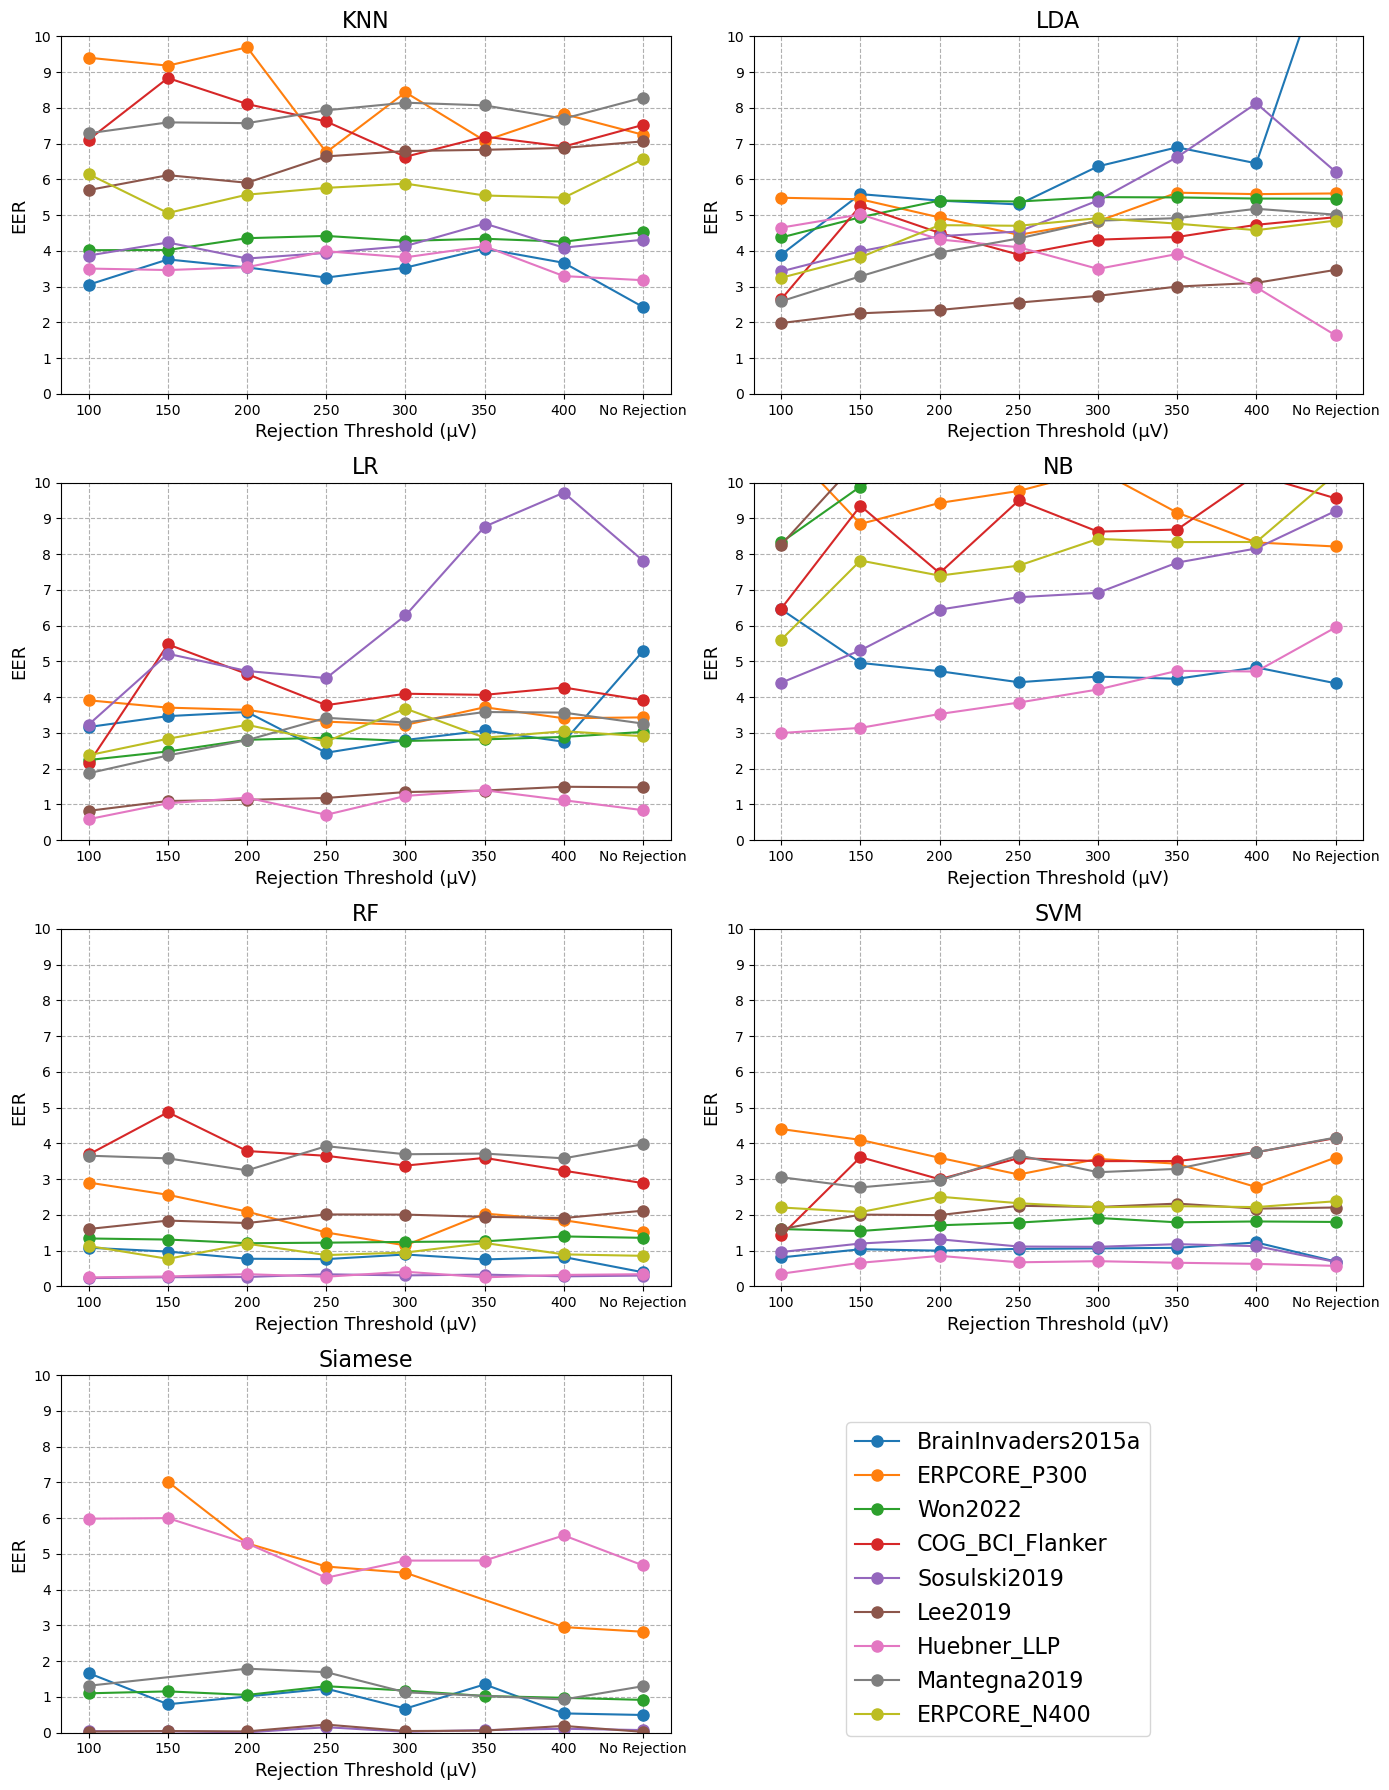

In [51]:
#import matplotlib.pyplot as plt

# Create subplots for each pipeline
fig, axs = plt.subplots(4, 2, figsize=(14, 18))
fig.tight_layout(pad=3.0)

# Flatten the 2D array of subplots for easy iteration
axs = axs.flatten()

# Create an empty list to store legend handles and labels
legend_handles = []

# Iterate over each pipeline
for i, pipeline in enumerate(grouped_epochs_rejection_df.pipeline.unique()):
    
    print(pipeline)
    # Check if there are enough subplots for the pipelines
    if i < len(axs):
        db = grouped_epochs_rejection_df[grouped_epochs_rejection_df['pipeline'] == pipeline]
        display(db)
        db['eer'] = db['eer'].astype('float64')

        # Choose the subplot for the current pipeline
        ax = axs[i]

        for dataset in set(db['dataset']):
            dataset_data = db[db['dataset'] == dataset]
            line, = ax.plot(dataset_data['Rejection_Threshold'], dataset_data['eer'], marker='o', markersize=8, label=dataset)
            legend_handles.append(line)

        # Set labels and title
        ax.set_xlabel('Rejection Threshold (µV)', fontsize=13)
        ax.set_ylabel('EER', fontsize=13)

        # Modify x-axis ticks
        ax.set_xticks([100, 150, 200, 250, 300, 350, 400, 450])
        ax.set_xticklabels([100, 150, 200, 250, 300, 350, 400, "No Rejection"])

        ax.set_ylim(0, 10)
        ax.set_yticks(range(0, 11, 1))

        ax.set_title(pipeline, fontsize=16)

        # Set y-axis ticks at intervals of 1
        ax.yaxis.set_major_locator(plt.MultipleLocator(base=1))
        ax.grid(True, ls="--", lw=0.8)

# Remove the axis from the 8th subplot
axs[7].axis("off")
axs[7].remove()

# Move the legend to the 8th subplot
fig.legend(legend_handles, set(grouped_epochs_rejection_df['dataset']), loc='center left', bbox_to_anchor=(0.6, 0.12), fontsize=12, prop={'size': 16})

# Adjust layout
plt.tight_layout()
plt.show()


In [52]:
#import matplotlib.pyplot as plt

# Iterate over each pipeline
for i, pipeline in enumerate(grouped_epochs_rejection_df.pipeline.unique()):
    db = grouped_epochs_rejection_df[grouped_epochs_rejection_df['pipeline'] == pipeline]
    db['eer'] = db['eer'].astype('float64')

    # Create a new plot for each pipeline
    plt.figure(figsize=(8, 6))

    # Plot each dataset
    for dataset in set(db['dataset']):
        dataset_data = db[db['dataset'] == dataset]
        line, = plt.plot(dataset_data['Rejection_Threshold'], dataset_data['eer'], label=dataset)

    # Set labels and title
    plt.xlabel('Rejection Threshold (µV)', fontsize=14)
    plt.ylabel('EER', fontsize=14)

    # Modify x-axis ticks
    plt.xticks([100, 150, 200, 250, 300, 350, 400, 450], [100, 150, 200, 250, 300, 350, 400, "No Rejection"])

    plt.title(pipeline, fontsize=16)

    # Set y-axis ticks at intervals of 1
    plt.yticks(plt.yticks()[0], [str(int(y)) for y in plt.yticks()[0]])
    plt.grid(True, ls="--", lw=0.8)

    # Create a legend outside the plot
    plt.legend(set(db['dataset']), loc='upper left', bbox_to_anchor=(1, 1), fontsize=12, prop={'size': 12})

    # Save the plot as a .pdf file
    plt.savefig(f'{pipeline}_plot.pdf', format='pdf', bbox_inches='tight')

    # Close the plot to release resources
    plt.close()


### Visualzing all the FRR at 1%FAR of Eochs Rejection in subplots

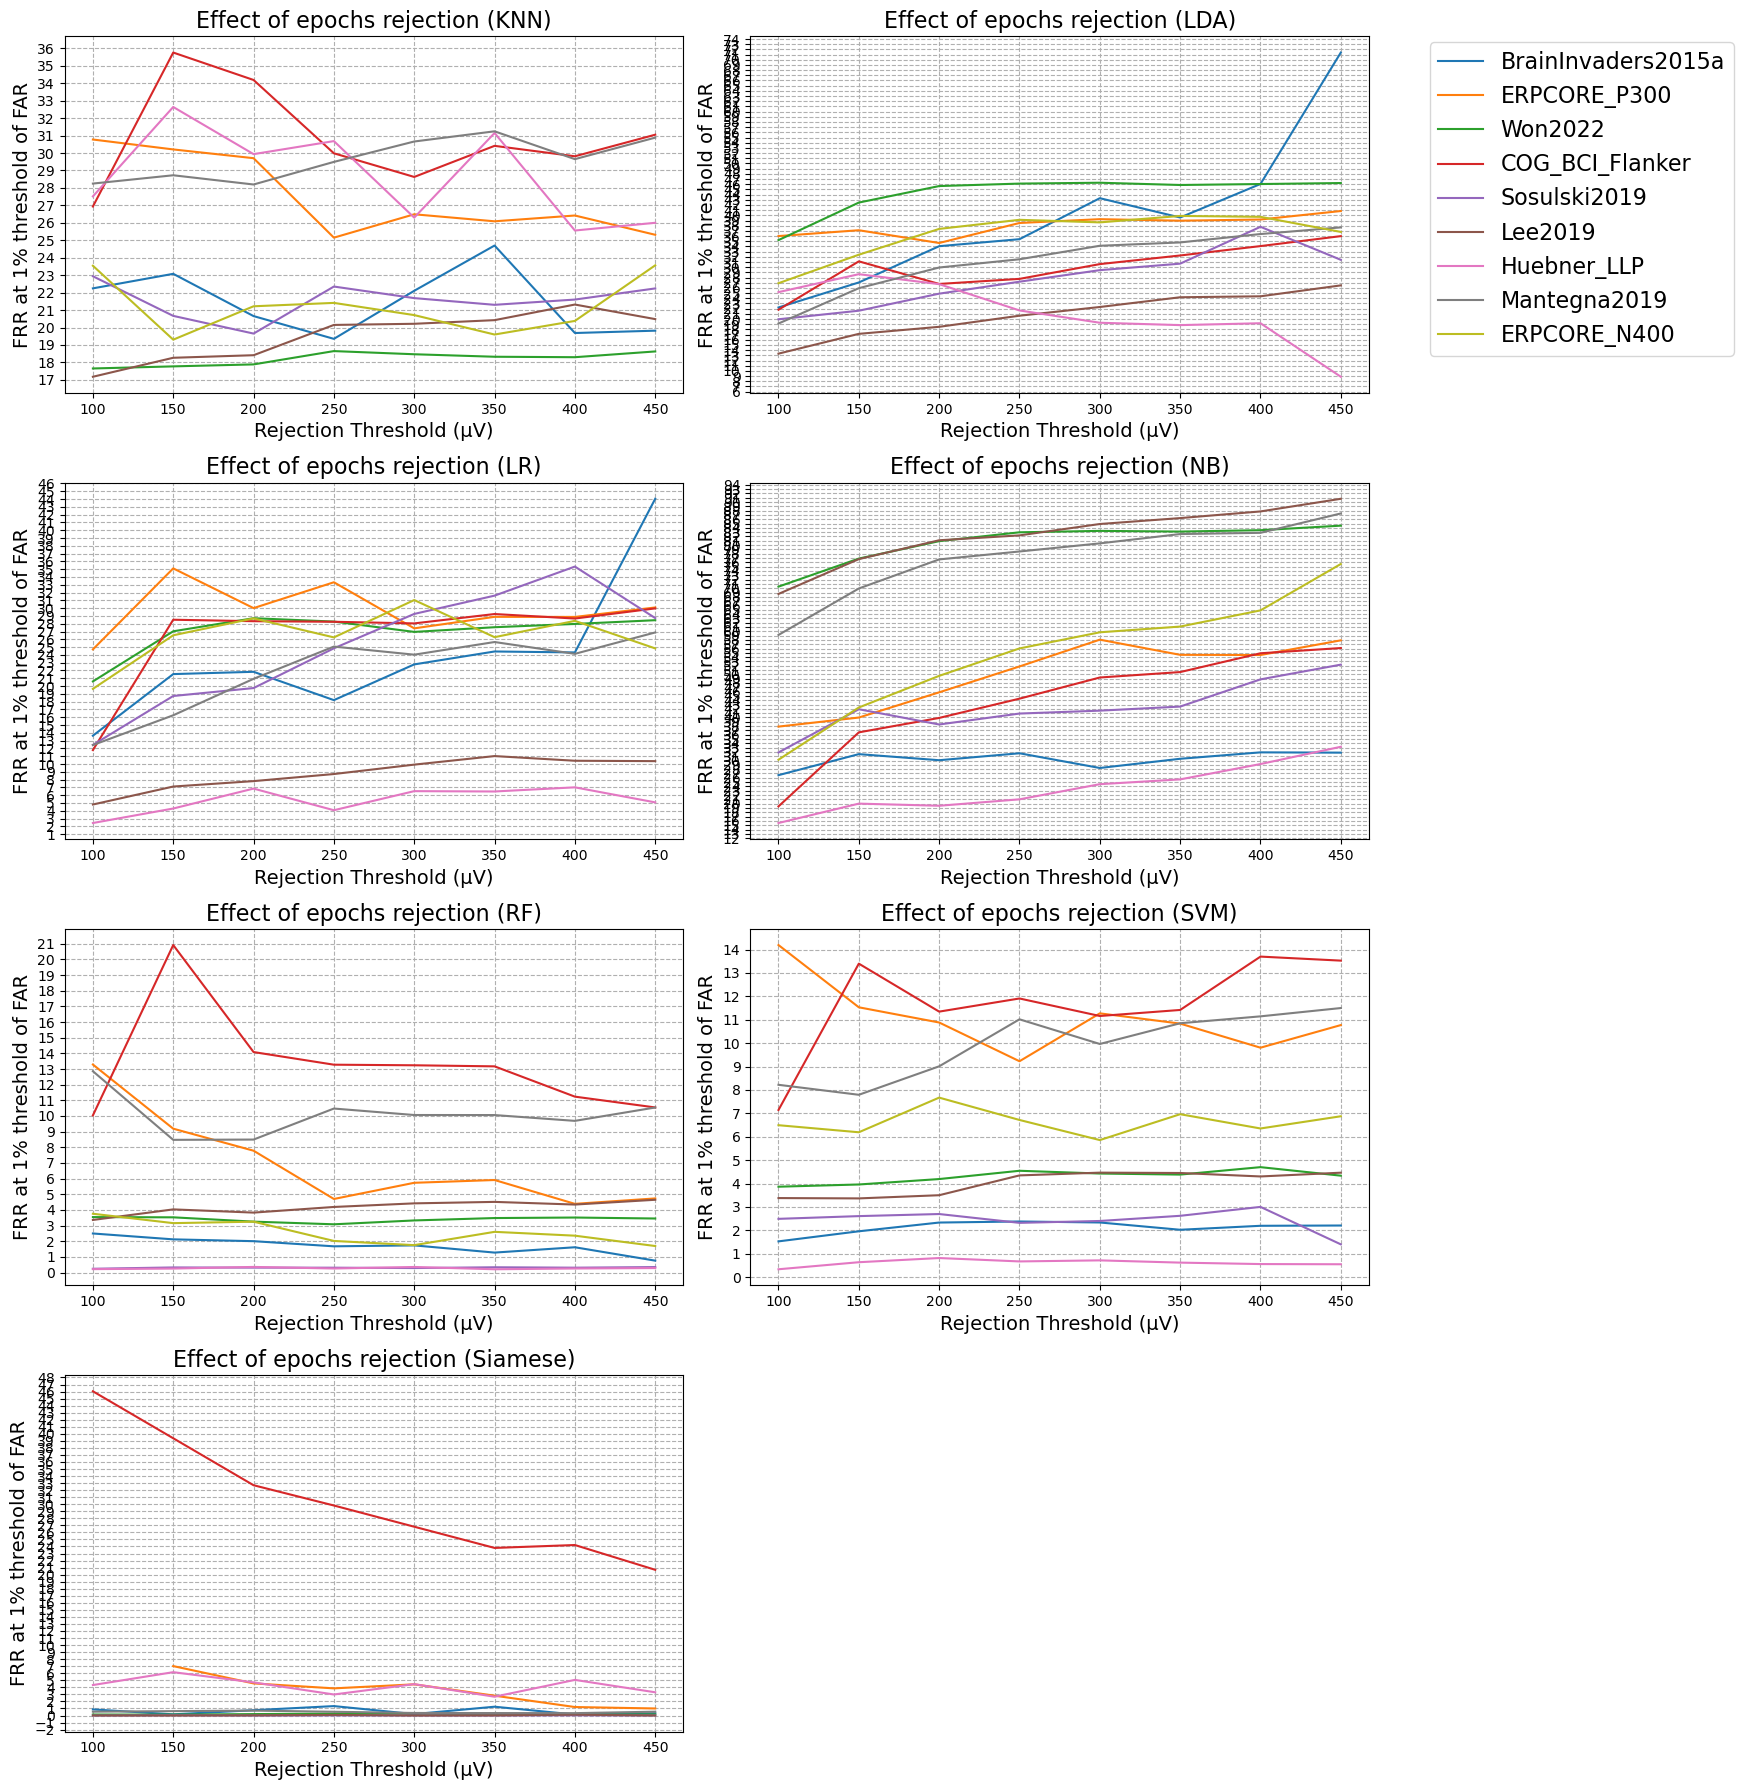

In [53]:
#import matplotlib.pyplot as plt

# Create subplots for each pipeline
fig, axs = plt.subplots(4, 2, figsize=(14, 18))

#print(fig.)

# Flatten the 2D array of subplots for easy iteration
axs = axs.flatten()

# Create an empty list to store legend handles and labels
legend_handles = []

# Iterate over each pipeline
for i, pipeline in enumerate(grouped_epochs_rejection_df.pipeline.unique()):
    # Check if there are enough subplots for the pipelines
    if i < len(axs):
        db = grouped_epochs_rejection_df[grouped_epochs_rejection_df['pipeline'] == pipeline]
        db['frr_1_far'] = db['frr_1_far'].astype('float64')

        # Choose the subplot for the current pipeline
        ax = axs[i]

        for dataset in set(db['dataset']):
            dataset_data = db[db['dataset'] == dataset]
            line, = ax.plot(dataset_data['Rejection_Threshold'], dataset_data['frr_1_far'], label=dataset)
            legend_handles.append(line)
            
#             # Add error bars to the line plot
#             ax.errorbar(dataset_data['Rejection_Threshold'], dataset_data['eer'], yerr=dataset_data['eer'], fmt='none', capsize=8)

        # Set labels and title

        # Set labels and title
        ax.set_xlabel('Rejection Threshold (µV)', fontsize=14)
        ax.set_ylabel('FRR at 1% threshold of FAR', fontsize=14)
        ax.set_title("Effect of epochs rejection (" + pipeline + ")", fontsize=16)

        # Set y-axis ticks at intervals of 1
        ax.yaxis.set_major_locator(plt.MultipleLocator(base=1))
        ax.grid(True, ls="--", lw=0.8)

# Create a legend outside the subplots
fig.legend(legend_handles, set(grouped_epochs_rejection_df['dataset']), loc='upper right', bbox_to_anchor=(1.25, 0.98), fontsize=12, prop={'size': 16})
plt.subplots_adjust(right=0.60)  # Adjust layout to make room for the legend

# Adjust layout
plt.tight_layout()
fig.delaxes(axs[7])
plt.show()


In [54]:
# import matplotlib.pyplot as plt

# # Load the DataFrame with the added column
# #grouped_epochs_rejection_df = pd.read_csv('grouped_epochs_rejection_with_std.csv')

# # Create subplots for each pipeline
# fig, axs = plt.subplots(4, 2, figsize=(14, 18))

# # Flatten the 2D array of subplots for easier iteration
# axs = axs.flatten()

# # Create an empty list to store legend handles and labels
# legend_handles = []

# # Iterate over each pipeline
# for i, pipeline in enumerate(grouped_epochs_rejection_df.pipeline.unique()):
#     # Check if there are enough subplots for the pipelines
#     if i < len(axs):
#         db = grouped_epochs_rejection_df[grouped_epochs_rejection_df['pipeline'] == pipeline]
#         db['eer'] = db['eer'].astype('float64')
#         db['eer_std'] = db['eer_std'].astype('float64')

#         # Choose the subplot for the current pipeline
#         ax = axs[i]

#         for dataset in set(db['dataset']):
#             dataset_data = db[db['dataset'] == dataset]
#             line, = ax.plot(dataset_data['Rejection_Threshold'], dataset_data['eer'], label=dataset)
#             legend_handles.append(line)

# #             # Add shading to the line plot
# #             ax.fill_between(dataset_data['Rejection_Threshold'], dataset_data['eer'] - dataset_data['eer_std'],
# #                            dataset_data['eer'] + dataset_data['eer_std'], alpha=0.4, color=line.get_color())

#         # Set labels and title
#         ax.set_xlabel('Rejection Threshold (µV)', fontsize=14)
#         ax.set_ylabel('EER', fontsize=14)
#         ax.set_title("Effect of epochs rejection (" + pipeline + ")", fontsize=16)

#         # Set y-axis ticks at intervals of 1
#         ax.yaxis.set_major_locator(plt.MultipleLocator(base=1))
#         ax.grid(True, ls="--", lw=0.8)

# # Create a legend outside the subplots
# fig.legend(legend_handles, set(grouped_epochs_rejection_df['dataset']), loc='upper right', bbox_to_anchor=(1.25, 0.98), fontsize=12, prop={'size': 16})
# plt.subplots_adjust(right=0.60)   # Adjust layout to make room for the legend

# # Adjust layout
# plt.tight_layout()
# fig.delaxes(axs[7])
# plt.show()
